# Project 2: Ames Housing Data and Kaggle Challenge

# Ames Housing Sale Price prediction

## Background
For our second project, we are going to take a look at the Ames Housing Data and submit our sale price prediction in [Kaggle](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge).  

## Problem Statement


### Kaggle Challenge

As mentioned in the background, the goal of this project is to predict the sales price for each house. For each Id in the test set, we needs to predict the value of the `SalePrice` variable.

The challenge evaluation is determined by [Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation) (RMSE).

There was no problem statement included in the Kaggle Challenge, hence we had developed the following Problem Statement to give a context to this project.

### Problem Statement developed
A real estate firm is looking to invest in Housing in Ames, Iowa and has obtained the selling price of some given homes from 2006 to 2010. However, some of the houses do not have sale price to compare against.

As data scientist working for the real estate firm, we were tasked to develop a model to predict the selling price of a given home in Ames, Iowa from 2006 to 2010, and predict the missing Sale Price in our dataset.

Our employer hopes to use this information to help assess whether the asking price of a house is higher or lower than the true value of the house. If the house is undervalued, it may be a good investment for the firm.

After investing, our employer would also like to find out what features drives the price of a house located in Ames, Iowa as potential redevelopment possibilities to increase the sale price.

__Summary of problem statement__<br>
- To explore and analyse the dataset to develop a model (with lowest RMSE) that predicts the housing sale price in Ames, Iowa.
- Using the model built, identify the top 3 features that will increase the sale price and identify 3 features that will lead to a decrease in the sale price.

## Report
This report is prepared for our management as we report back on the task assigned to us. 

The report is prepared in two parts:
1. [Data_Cleaning_and_EDA.ipynb](./Data_Cleaning_and_EDA.ipynb) (current): Data Cleaning and Exploratory Data Analysis of the given data
2. [ames_housing_saleprice_prediction.ipynb](./ames_housing_saleprice_prediction.ipynb): Preprocessing, Modeling and Prediction. Overall Conclusion and Recommendation. 

## Contents:
- [Initialising notebook](#Initialising-notebook)
    - [Libraries](#Libraries)
    - [Functions used](#Functions-used)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
    - [Data Dictionary](#Data-Dictionary)
    - [Load the Data](#Load-the-Data)
    - [Data Cleaning](#Data-Cleaning)
        - [train.csv](#train_data)
        - [test.csv](#test_data)
    - [Rename Dataframe](#Rename-DataFrame)
    - [Data Prepping](#Data-Prepping)
    - [Data Export](#Data-Export)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [SalePrice](#SalePrice)
    - [Overall_Qual](#Overall_Qual)
    - [Gr_Liv_Area](#Gr_Liv_Area)
    - [Total_Bsmt_SF](#Total_Bsmt_SF)
    - [Garage_Area](#Garage_Area)
    - [Garage_Cars](#Garage_Cars)
    - [Enclosed_Porch](#Enclosed_Porch)
    - [Kitchen_AbvGr](#Kitchen_AbvGr)
    - [Overall_Cond](#Overall_Cond)
- [Conclusions](#Conclusions)

## Initialising notebook

In this section, we will list down the libraries and functions used in this notebook.

### Libraries
We will import the libraries that are used in this notebook.

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# module for metrics
from sklearn import metrics

# for file exporting
import os

## Functions used
We will list the functions used in this notebook.

In [2]:
# function for boxplot or violinplot
# row : int64 - number of rows
# col: int 64 - number of columns
# xval : list - x-variable for graph plotting
# title : list - graph titles
# dataset : dataframe
# graph_suptitle: figure suptitle

def box_plot(row, col, xval, title, dataset, graph_suptitle):
    
    # to have subplots with row and col figsize = (16, 9)
    fig, axes = plt.subplots(row, col, figsize=(16,9))
    fig.suptitle(graph_suptitle)
    
    counter = 0
    
    if (row == 1) or (col == 1):
        for i in range(max(row, col)):
            sns.boxplot(ax=axes[i], x = xval[counter], data = dataset)
#            axes[i].set_title(title[counter])
            counter += 1
    else: 
        for r in range(row):
            for c in range(col):
                sns.boxplot(ax=axes[r,c], x = xval[counter], data = dataset)
#                axes[r,c].set_title(title[counter])
                counter += 1
    
    plt.tight_layout()    #help to add more space/adjust the plots to best layout (like a print job, best fit)

    plt.show()

In [3]:
# Adapted from https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
# Function for histogram plotting
# row : int64 - number of rows
# col: int 64 - number of columns
# xval : list - x-variable for graph plotting
# title : list - graph titles
# dataset : dataframe
# graph_suptitle: figure suptitle

def histogram_plot(row, col, xval, title, dataset, graph_suptitle):
    
    # to have subplots with row and col figsize = (16, 9)
    fig, axes = plt.subplots(row, col, figsize=(16,9))
    fig.suptitle(graph_suptitle)
    
    counter = 0
    
    if (row == 1) or (col == 1):
        for i in range(max(row, col)):
            sns.histplot(ax=axes[i], x = xval[counter], data = dataset, bins = 15, kde=True)
            counter += 1
    else:
        for r in range(row):
            for c in range(col):
                sns.histplot(ax=axes[r,c], x = xval[counter], data = dataset, bins = 15, kde=True)
                counter += 1

    plt.tight_layout()    #help to add more space/adjust the plots to best layout (like a print job, best fit)

    plt.show()

In [4]:
# Function for barplot plotting
# row : int64 - number of rows
# col: int 64 - number of columns
# xval : list - x-variable for graph plotting
# dataset : dataframe
# graph_suptitle: figure suptitle

def bar_plot(row, col, xval, dataset, graph_suptitle):
    
    # to have subplots with row and col figsize = (16, 9)
    fig, axes = plt.subplots(row, col, figsize=(16,9))
    fig.suptitle(graph_suptitle)
    
    counter = 0
    
    if (row == 1) or (col == 1):
        for i in range(max(row, col)):
            plt.subplot(row, col, counter+1)
            dataset[xval[counter]].value_counts().plot.bar()
            plt.xlabel(xval[counter])
            counter += 1
    else:
        for r in range(row):
            for c in range(col):
                plt.subplot(row, col, counter+1)
                dataset[xval[counter]].value_counts().plot.bar()
                plt.xlabel(xval[counter])
                counter += 1

    plt.tight_layout()    #help to add more space/adjust the plots to best layout (like a print job, best fit)

    plt.show()

## Data Import and Cleaning


### Data Dictionary

Data Dictionary: [source](https://web.archive.org/web/20201203235151/http://jse.amstat.org/v19n3/Decock/DataDocumentation.txt)
<br>Remarks: A copy of the data dictionary can be found in the [folder](./datasets/data_description.md). 

|	Feature	|	Type	|	Dataset	|	Description	|
|	-	|	-	|	-	|	-	|
|	Id	|	 int64	|	train_data, test_data	|	Observation number	|
|	PID	|	 int64	|	train_data, test_data	|	Parcel identification number - can be used with city web site for parcel review.	|
|	MS_SubClass	|	 int64	|	train_data, test_data	|	Identifies the type of dwelling involved in the sale.	|
|	MS_Zoning	|	 object 	|	train_data, test_data	|	Identifies the general zoning classification of the sale.	|
|	Lot_Frontage	|	 float64	|	train_data, test_data	|	Linear feet of street connected to property	|
|	Lot_Area	|	 int64	|	train_data, test_data	|	Lot size in square feet	|
|	Street	|	 object 	|	train_data, test_data	|	Type of road access to property	|
|	Alley	|	 object 	|	train_data, test_data	|	Type of alley access to property	|
|	Lot_Shape	|	 object 	|	train_data, test_data	|	General shape of property	|
|	Land_Contour	|	 object 	|	train_data, test_data	|	Flatness of the property	|
|	Utilities	|	 object 	|	train_data, test_data	|	Type of utilities available	|
|	Lot_Config	|	 object 	|	train_data, test_data	|	Lot configuration	|
|	Land_Slope	|	 object 	|	train_data, test_data	|	Slope of property	|
|	Neighborhood	|	 object 	|	train_data, test_data	|	Physical locations within Ames city limits	|
|	Condition_1	|	 object 	|	train_data, test_data	|	Proximity to various conditions	|
|	Condition_2	|	 object 	|	train_data, test_data	|	Proximity to various conditions (if more than one is present)	|
|	Bldg_Type	|	 object 	|	train_data, test_data	|	Type of dwelling	|
|	House_Style	|	 object 	|	train_data, test_data	|	Style of dwelling	|
|	Overall_Qual	|	 int64	|	train_data, test_data	|	Rates the overall material and finish of the house	|
|	Overall_Cond	|	 int64	|	train_data, test_data	|	Rates the overall condition of the house	|
|	Year_Built	|	 int64	|	train_data, test_data	|	Original construction date	|
|	Year_Remod/Add	|	 int64	|	train_data, test_data	|	Remodel date (same as construction date if no remodeling or additions)	|
|	Roof_Style	|	 object 	|	train_data, test_data	|	Type of roof	|
|	Roof_Matl	|	 object 	|	train_data, test_data	|	Roof material	|
|	Exterior_1st	|	 object 	|	train_data, test_data	|	Exterior covering on house	|
|	Exterior_2nd	|	 object 	|	train_data, test_data	|	Exterior covering on house (if more than one material)	|
|	Mas_Vnr_Type	|	 object 	|	train_data, test_data	|	Masonry veneer type	|
|	Mas_Vnr_Area	|	 float64	|	train_data, test_data	|	Masonry veneer area in square feet	|
|	Exter_Qual	|	 object 	|	train_data, test_data	|	Evaluates the quality of the material on the exterior	|
|	Exter_Cond	|	 object 	|	train_data, test_data	|	Evaluates the present condition of the material on the exterior	|
|	Foundation	|	 object 	|	train_data, test_data	|	Type of foundation	|
|	Bsmt_Qual	|	 object 	|	train_data, test_data	|	Evaluates the height of the basement	|
|	Bsmt_Cond	|	 object 	|	train_data, test_data	|	Evaluates the general condition of the basement	|
|	Bsmt_Exposure	|	 object 	|	train_data, test_data	|	Refers to walkout or garden level walls	|
|	BsmtFin_Type_1	|	 object 	|	train_data, test_data	|	Rating of basement finished area	|
|	BsmtFin_SF_1	|	 float64 / int64	|	train_data, test_data	|	Type 1 finished square feet	|
|	BsmtFin_Type_2	|	 object 	|	train_data, test_data	|	Rating of basement finished area (if multiple types)	|
|	BsmtFin_SF_2	|	 float64 / int64	|	train_data, test_data	|	Type 2 finished square feet	|
|	Bsmt_Unf_SF	|	 float64 / int64	|	train_data, test_data	|	Unfinished square feet of basement area	|
|	Total_Bsmt_SF	|	 float64 / int64	|	train_data, test_data	|	Total square feet of basement area	|
|	Heating	|	 object 	|	train_data, test_data	|	Type of heating	|
|	Heating_QC	|	 object 	|	train_data, test_data	|	Heating quality and condition	|
|	Central_Air	|	 object 	|	train_data, test_data	|	Central air conditioning	|
|	Electrical	|	 object 	|	train_data, test_data	|	Electrical system	|
|	1st_Flr_SF	|	 int64	|	train_data, test_data	|	First Floor square feet	|
|	2nd_Flr_SF	|	 int64	|	train_data, test_data	|	Second floor square feet	|
|	Low_Qual_Fin_SF	|	 int64	|	train_data, test_data	|	Low quality finished square feet (all floors)	|
|	Gr_Liv_Area	|	 int64	|	train_data, test_data	|	Above grade (ground) living area square feet	|
|	Bsmt_Full_Bath	|	 float64 / int64	|	train_data, test_data	|	Basement full bathrooms	|
|	Bsmt_Half_Bath	|	 float64 / int64	|	train_data, test_data	|	Basement half bathrooms	|
|	Full_Bath	|	 int64	|	train_data, test_data	|	Full bathrooms above grade	|
|	Half_Bath	|	 int64	|	train_data, test_data	|	Half baths above grade	|
|	Bedroom_AbvGr	|	 int64	|	train_data, test_data	|	Bedrooms above grade (does NOT include basement bedrooms)	|
|	Kitchen_AbvGr	|	 int64	|	train_data, test_data	|	Kitchens above grade	|
|	Kitchen_Qual	|	 object 	|	train_data, test_data	|	Kitchen quality	|
|	TotRms_AbvGrd	|	 int64	|	train_data, test_data	|	Total rooms above grade (does not include bathrooms)	|
|	Functional	|	 object 	|	train_data, test_data	|	Home functionality (Assume typical unless deductions are warranted)	|
|	Fireplaces	|	 int64	|	train_data, test_data	|	Number of fireplaces	|
|	Fireplace_Qu	|	 object 	|	train_data, test_data	|	Fireplace quality	|
|	Garage_Type	|	 object 	|	train_data, test_data	|	Garage location	|
|	Garage_Yr_Blt	|	 float64	|	train_data, test_data	|	Year garage was built	|
|	Garage_Finish	|	 object 	|	train_data, test_data	|	Interior finish of the garage	|
|	Garage_Cars	|	 float64 / int64	|	train_data, test_data	|	Size of garage in car capacity	|
|	Garage_Area	|	 float64 / int64	|	train_data, test_data	|	Size of garage in square feet	|
|	Garage_Qual	|	 object 	|	train_data, test_data	|	Garage quality	|
|	Garage_Cond	|	 object 	|	train_data, test_data	|	Garage condition	|
|	Paved_Drive	|	 object 	|	train_data, test_data	|	Paved driveway	|
|	Wood_Deck_SF	|	 int64	|	train_data, test_data	|	Wood deck area in square feet	|
|	Open_Porch_SF	|	 int64	|	train_data, test_data	|	Open porch area in square feet	|
|	Enclosed_Porch	|	 int64	|	train_data, test_data	|	Enclosed porch area in square feet	|
|	3Ssn_Porch	|	 int64	|	train_data, test_data	|	Three season porch area in square feet	|
|	Screen_Porch	|	 int64	|	train_data, test_data	|	Screen porch area in square feet	|
|	Pool_Area	|	 int64	|	train_data, test_data	|	Pool area in square feet	|
|	Pool_QC	|	 object 	|	train_data, test_data	|	Pool quality	|
|	Fence	|	 object 	|	train_data, test_data	|	Fence quality	|
|	Misc_Feature	|	 object 	|	train_data, test_data	|	Miscellaneous feature not covered in other categories	|
|	Misc_Val	|	 int64	|	train_data, test_data	|	$Value of miscellaneous feature	|
|	Mo_Sold	|	 int64	|	train_data, test_data	|	Month Sold (MM)	|
|	Yr_Sold	|	 int64	|	train_data, test_data	|	Year Sold (YYYY)	|
|	Sale_Type	|	 object 	|	train_data, test_data	|	Type of sale	|
|	SalePrice	|	 int64	|	train_data	|	Sale price $$	|

### Load the Data
Looking through the data dictionary, we noticed that there is features with `NA` as one of the category. As such, we will exclude the value `NA` from being recognised as NA when first read of the file. This can be achieved when reading the file using pandas ([source](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)).

```python
# originally, the list of values identified as empty
na_values = ['', '#N/A', '#N/A N/A', '#NA', '-1.\#IND', '-1.\#QNAN', '-NaN', '-nan', '1.\#IND', '1.\#QNAN',
          '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null']

# revised list will be as follows, by taking out 'NA'
na_val = ['', '#N/A', '#N/A N/A', '#NA', '-1.\#IND', '-1.\#QNAN', '-NaN', '-nan', '1.\#IND', '1.\#QNAN',
          '<NA>', 'N/A', 'NULL', 'NaN', 'n/a', 'nan', 'null']

```

In [5]:
# define the list of values to be identified as missing data
na_val = ['', '#N/A', '#N/A N/A', '#NA', '-1.\#IND', '-1.\#QNAN', '-NaN', '-nan', '1.\#IND', '1.\#QNAN',
          '<NA>', 'N/A', 'NULL', 'NaN', 'n/a', 'nan', 'null']

# read the data
train_data = pd.read_csv('../datasets/train.csv', keep_default_na=False, na_values=na_val)
test_data = pd.read_csv('../datasets/test.csv', keep_default_na=False, na_values=na_val)

print(f'shape of train data: {train_data.shape}')
print(f'shape of test data: {test_data.shape}')

shape of train data: (2051, 81)
shape of test data: (878, 80)


### Data Cleaning

As `train_data` has a larger number of data compared to `test_data`, we will perform data cleaning on `train_data`first and mirror the method for `test_data` should there be same features with missing data. 

#### train_data

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
# null data for train
print(f'Feature Name  |  Number of null values  | Percentage of null values |  Dtype of Feature ')
for index in train_data.isnull().sum().index[train_data.isnull().sum() > 0]:
    print(f'{index}  |  {train_data.isnull().sum()[index]}  | {round(train_data.isnull().sum()[index]/2051, 2)} |  {train_data.dtypes[index]} ')

Feature Name  |  Number of null values  | Percentage of null values |  Dtype of Feature 
Lot Frontage  |  330  | 0.16 |  float64 
Mas Vnr Type  |  22  | 0.01 |  object 
Mas Vnr Area  |  22  | 0.01 |  float64 
Bsmt Qual  |  1  | 0.0 |  object 
Bsmt Cond  |  1  | 0.0 |  object 
Bsmt Exposure  |  4  | 0.0 |  object 
BsmtFin Type 1  |  1  | 0.0 |  object 
BsmtFin SF 1  |  1  | 0.0 |  float64 
BsmtFin Type 2  |  2  | 0.0 |  object 
BsmtFin SF 2  |  1  | 0.0 |  float64 
Bsmt Unf SF  |  1  | 0.0 |  float64 
Total Bsmt SF  |  1  | 0.0 |  float64 
Bsmt Full Bath  |  2  | 0.0 |  float64 
Bsmt Half Bath  |  2  | 0.0 |  float64 
Garage Yr Blt  |  114  | 0.06 |  float64 
Garage Finish  |  1  | 0.0 |  object 
Garage Cars  |  1  | 0.0 |  float64 
Garage Area  |  1  | 0.0 |  float64 
Garage Qual  |  1  | 0.0 |  object 
Garage Cond  |  1  | 0.0 |  object 


`Lot Frontage` represents the linear feet of street connected to property. Refering to the data dictionary, we see that it is a continuous value. 

With an estimated of 16% data missing, we will drop this feature as there is insufficient data to predict the missing values. 

In [8]:
# drop the feature
train_data.drop(columns=['Lot Frontage'], inplace=True)

- `Mas Vnr Type` : Masonry veneer type
- `Mas Vnr Area` : Masonry veneer area in square feet

`Mas Vnr Type` is a categorical feature, we will fill the 22 empty object with the highest count of values for `Mas Vnr Type`. As `Mas Vnr Area` is closely related to `Mas Vnr Type`, we will look for the values of `Mas Vnr Type` for the missing values in `Mas Vnr Area`. 

In [9]:
# find the highest count of values for Mas Vnr Type
train_data[['Mas Vnr Type']].value_counts()

Mas Vnr Type
None            1218
BrkFace          630
Stone            168
BrkCmn            13
dtype: int64

In [10]:
# Find values of 'Mas Vnr Type' for the missing values in 'Mas Vnr Area'.
train_data.loc[train_data['Mas Vnr Area'].isnull(), ['Mas Vnr Type', 'Mas Vnr Area']]

,Mas Vnr Type,Mas Vnr Area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


Upon inspection, we see that the same row of data has the missing values for both `Mas Vnr Type` and `Mas Vnr Area`. We will fill in the value `None` for `Mas Vnr Type`, which has the highest count, and this suggest filling `0` for `Mas Vnr Area`. 

In [11]:
# We can see that the rows with null values in 'Mas Vnr Type' is also a null value in 'Mas Vnr Area'
# We will replace null in 'Mas Vnr Type' with 'None' and 'Mas Vnr Area' with 0
train_data['Mas Vnr Type'].fillna(value='None', inplace=True)
train_data['Mas Vnr Area'].fillna(value=0, inplace=True)

Let's look at the basement values (as there are some with null values).
1. `Bsmt Qual` : Evaluates the height of the basement
2. `Bsmt Cond` : Evaluates the general condition of the basement
3. `Bsmt Exposure` : Refers to walkout or garden level walls
4. `BsmtFin Type 1` : Rating of basement finished area
5. `BsmtFin SF 1` : Type 1 finished square feet
6. `BsmtFin Type 2` : Rating of basement finished area (if multiple types)
7. `BsmtFin SF 2` : Type 2 finished square feet
8. `Bsmt Unf SF` : Unfinished square feet of basement area
9. `Total Bsmt SF` : Total square feet of basement area
10. `Bsmt Full Bath` : Basement full bathrooms
11. `Bsmt Half Bath`: Basement half bathrooms

In [12]:
# Let's look at the basement values (as there are some with null values)
# We noticed that by looking at the null values for 'Bsmt Exposure' or `BsmtFin Type 2` or 'Bsmt Full Bath',
# we will be to see all the null values for the basement values
basement_list = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
                 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath','Bsmt Half Bath']
train_data.loc[(train_data['Bsmt Exposure'].isnull() | train_data['BsmtFin Type 2'].isnull() |
                train_data['Bsmt Full Bath'].isnull()), basement_list].isnull().sum()

Bsmt Qual         1
Bsmt Cond         1
Bsmt Exposure     4
BsmtFin Type 1    1
BsmtFin SF 1      1
BsmtFin Type 2    2
BsmtFin SF 2      1
Bsmt Unf SF       1
Total Bsmt SF     1
Bsmt Full Bath    2
Bsmt Half Bath    2
dtype: int64

In [13]:
# Lets look at the rows with the missing values
train_data.loc[(train_data['Bsmt Exposure'].isnull() | train_data['BsmtFin Type 2'].isnull() |
                train_data['Bsmt Full Bath'].isnull()), basement_list]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN
1147,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


Instead of looking at all the features at once, we will look at the first 3 features, `Bsmt Qual`, `Bsmt Cond` and `Bsmt Exposure` and how we will fill them up as this will potentially impact the values that we will be filling up with for remaining features, `BsmtFin Type 1`, `BsmtFin SF 1`, `BsmtFin Type 2`, `BsmtFin SF 2`, `Bsmt Unf SF`, `Total Bsmt SF`, `Bsmt Full Bath` and `Bsmt Half Bath`, such as if there is a basment of no basement, these features will be filled with `NA` or `0`.

As there is no details on whether is there a basement for `Bsmt Qual` and `Bsmt Cond` missing values (row `1327`), and the feature is categorical, we will fill the missing values with the highest count of values. `Bsmt Exposure` does not really have any known relationship with the remaining features other than having no basement will have `NA` for `Bsmt Exposure`. 

Running the below cell, we noticed that the highest counts for `Bsmt Qual`, `Bsmt Cond` is `TA` (representing typical), and `Bsmt Exposure` being `No`. We also noticed that the combination had the highest count as well. We will fill the missing values with these values.

In [14]:
# find the highest count of values for 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure'
for i in basement_list[0:3]:
    print(i.center(20, '='))
    print(train_data[i].value_counts())
print()
print(train_data[basement_list[0:3]].value_counts())

=====Bsmt Qual======
TA    887
Gd    864
Ex    184
Fa     60
NA     54
Po      1
Name: Bsmt Qual, dtype: int64
=====Bsmt Cond======
TA    1834
Gd      89
Fa      65
NA      54
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64
===Bsmt Exposure====
No    1339
Av     288
Gd     203
Mn     163
NA      54
Name: Bsmt Exposure, dtype: int64

Bsmt Qual  Bsmt Cond  Bsmt Exposure
TA         TA         No               675
Gd         TA         No               473
                      Av               173
                      Gd                95
                      Mn                69
Ex         TA         Gd                66
TA         TA         Av                62
                      Mn                60
NA         NA         NA                54
Ex         TA         No                46
TA         Fa         No                43
Ex         TA         Av                37
Fa         TA         No                35
Gd         Gd         No                23
TA         TA         G

In [15]:
# fill in the missing values
train_data['Bsmt Qual'].fillna(value='TA', inplace=True)
train_data['Bsmt Cond'].fillna(value='TA', inplace=True)
train_data['Bsmt Exposure'].fillna(value='No', inplace=True)

In [16]:
# Lets relook at the rows with the missing values
# 'Bsmt Qual' and 'Bsmt Cond' and 'Bsmt Exposure' no longer have missing values
train_data.loc[(train_data['BsmtFin Type 2'].isnull() |
                train_data['Bsmt Full Bath'].isnull()), basement_list]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN
1147,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0
1327,TA,TA,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For row `616`, we noticed that there is no basement and hence, we will fill in `0` for `Bsmt Full Bath` and `Bsmt Half Bath`.

For row `1147`, there is value in `BsmtFin SF 2`, suggesting there is value in `BsmtFin Type 2`. As this is a categorical value, we will fill in the value as the highest count of the column (if NA is highest count, we will fill in as next highest count). 

For row `1327`, we had filled in the values using highest count for `Bsmt Qual`, `Bsmt Cond` and `Bsmt Exposure`. We will fill in the remaining feature for `BsmtFin Type 1`, `BsmtFin SF 1`, `BsmtFin Type 2`, `BsmtFin SF 2`, `Bsmt Unf SF`, `Total Bsmt SF`, `Bsmt Full Bath` and `Bsmt Half Bath` using highest count (categorical feature) or mode (continuous feature). For `Total Bsmt SF`, we will sum `BsmtFin SF 1`, `BsmtFin SF 2` and `Bsmt Unf SF`.

In [17]:
for i in basement_list[3:11]:
    print(i.center(20, '='))
    print(train_data[i].value_counts())
print()

===BsmtFin Type 1===
GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NA      54
Name: BsmtFin Type 1, dtype: int64
====BsmtFin SF 1====
0.0       657
24.0       17
16.0       10
20.0        7
384.0       7
         ... 
718.0       1
900.0       1
918.0       1
1619.0      1
1159.0      1
Name: BsmtFin SF 1, Length: 821, dtype: int64
===BsmtFin Type 2===
Unf    1749
Rec      80
LwQ      60
NA       54
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64
====BsmtFin SF 2====
0.0       1803
294.0        5
539.0        3
72.0         3
180.0        3
          ... 
232.0        1
1393.0       1
95.0         1
351.0        1
120.0        1
Name: BsmtFin SF 2, Length: 205, dtype: int64
====Bsmt Unf SF=====
0.0       165
384.0      14
672.0      11
728.0      10
816.0       9
         ... 
266.0       1
20.0        1
521.0       1
109.0       1
1211.0      1
Name: Bsmt Unf SF, Length: 967, dtype: int64
===Total Bsmt SF====
0.0       54
864.0     51
1040.0 

In [18]:
# fill in the missing values
train_data.loc[616, 'Bsmt Half Bath'] = 0
train_data.loc[616, 'Bsmt Full Bath'] = 0
train_data.loc[1147, 'BsmtFin Type 2'] = 'Unf'
train_data.loc[1327, 'BsmtFin Type 1'] = 'GLQ'
train_data.loc[1327, 'BsmtFin SF 1'] = 24   # As there is BsmtFin Type 1, we will use next highest value instead of 0
train_data.loc[1327, 'BsmtFin Type 2'] = 'Unf'
train_data.loc[1327, 'BsmtFin SF 2'] = 0
train_data.loc[1327, 'Bsmt Unf SF'] = 0
train_data.loc[1327, 'Total Bsmt SF'] = (train_data.loc[1327, 'BsmtFin SF 1'] + train_data.loc[1327, 'BsmtFin SF 2'] 
                                         + train_data.loc[1327, 'Bsmt Unf SF'])
train_data.loc[1327, 'Bsmt Full Bath'] = 0
train_data.loc[1327, 'Bsmt Half Bath'] = 0

Lets look at the Garage values as there are some null values:

1. `Garage Type` : Garage Location
2. `Garage Yr Blt` : Year Garage was built
3. `Garage Finish` : Interior finish of the garage
4. `Garage Cars` : Size of garage in car capacity
5. `Garage Area` : Siza of garage in square feet
6. `Garage Qual` : Garage quality
7. `Garage Cond` : Garage condition 

Of which, `Garage Yr Blt`, `Garage Finish`, `Garage Cars`, `Garage Area`, `Garage Qual` and `Garage Cond` has missing values. 

In [19]:
# Lets look at the rows with the missing values
garage_list = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
               'Garage Area', 'Garage Qual', 'Garage Cond']
train_data.loc[train_data['Garage Yr Blt'].isnull(), garage_list]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,NA,NaN,NA,0.0,0.0,NA,NA
53,NA,NaN,NA,0.0,0.0,NA,NA
65,NA,NaN,NA,0.0,0.0,NA,NA
79,NA,NaN,NA,0.0,0.0,NA,NA
101,NA,NaN,NA,0.0,0.0,NA,NA
...,...,...,...,...,...,...,...
1991,NA,NaN,NA,0.0,0.0,NA,NA
2010,NA,NaN,NA,0.0,0.0,NA,NA
2027,NA,NaN,NA,0.0,0.0,NA,NA
2039,NA,NaN,NA,0.0,0.0,NA,NA


We noticed that there `Garage Yr Blt` has about 6% data missing, hence we will drop this feature as there is insufficient data to accurately predict the missing values. 

In [20]:
# drop the feature
train_data.drop(columns=['Garage Yr Blt'], inplace=True)

In [21]:
# Lets relook at the rows with the missing values
garage_list.remove('Garage Yr Blt')  # update the garage_list
train_data.loc[train_data['Garage Finish'].isnull(), garage_list]

,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN


To fill the missing values, we will use the combination for `Detchd` Garage with the highest count. 
Running the below cell, we will fill in the empty values with the below values for row 1712:
- Garage Finish: Unf
- Garage Cars: 2.0
- Garage Area: 576
- Garage Qual: TA
- Garage Cond: TA

In [22]:
train_data[['Garage Type', 'Garage Finish', 'Garage Cars',
               'Garage Area', 'Garage Qual', 'Garage Cond']].value_counts()

Garage Type  Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond
NA           NA             0.0          0.0          NA           NA             113
Detchd       Unf            2.0          576.0        TA           TA              40
                            1.0          240.0        TA           TA              32
                            2.0          440.0        TA           TA              24
                            1.0          308.0        TA           TA              22
                                                                                 ... 
Attchd       RFn            2.0          638.0        TA           TA               1
                                         639.0        TA           TA               1
                                         645.0        TA           TA               1
                                         656.0        TA           TA               1
                            3.0          1231.0       TA     

In [23]:
# fill in the missing values
train_data.loc[1712, 'Garage Finish'] = 'Unf'
train_data.loc[1712, 'Garage Cars'] = 2
train_data.loc[1712, 'Garage Area'] = 576
train_data.loc[1712, 'Garage Qual'] = 'TA'
train_data.loc[1712, 'Garage Cond'] = 'TA'

In [24]:
# Verify there is no more null data for train
print(f'Feature Name  |  Number of null values  | Percentage of null values |  Dtype of Feature ')
for index in train_data.isnull().sum().index[train_data.isnull().sum() > 0]:
    print(f'{index}  |  {train_data.isnull().sum()[index]}  | {round(train_data.isnull().sum()[index]/2051, 2)} |  {train_data.dtypes[index]} ')

Feature Name  |  Number of null values  | Percentage of null values |  Dtype of Feature 


In [25]:
# check that train_data has no more null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

We have finished cleaning `train_data`. 
### test_data

Lets clean `test_data`. 

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            878 non-null    object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [27]:
# null data for test_data
print(f'Feature Name  |  Number of null values  | Percentage of null values |  Dtype of Feature ')
for index in test_data.isnull().sum().index[test_data.isnull().sum() > 0]:
    print(f'{index}  |  {test_data.isnull().sum()[index]}  | {round(test_data.isnull().sum()[index]/2051, 2)} |  {test_data.dtypes[index]} ')

Feature Name  |  Number of null values  | Percentage of null values |  Dtype of Feature 
Lot Frontage  |  160  | 0.08 |  float64 
Mas Vnr Type  |  1  | 0.0 |  object 
Mas Vnr Area  |  1  | 0.0 |  float64 
Electrical  |  1  | 0.0 |  object 
Garage Yr Blt  |  45  | 0.02 |  float64 
Garage Finish  |  1  | 0.0 |  object 


With an estimated of 8% data missing, we will drop the `Lot Frontage` feature. 

In [28]:
# drop the feature
test_data.drop(columns=['Lot Frontage'], inplace=True)

`Mas Vnr Type` is a categorical feature, we will fill the 1 empty object with the highest count of values for `Mas Vnr Type`. As `Mas Vnr Area` is closely related to `Mas Vnr Type`, we will look for the values of `Mas Vnr Type` for the missing values in `Mas Vnr Area`. 

In [29]:
# find the highest count of values for Mas Vnr Type
test_data[['Mas Vnr Type']].value_counts()

Mas Vnr Type
None            534
BrkFace         250
Stone            80
BrkCmn           12
CBlock            1
dtype: int64

In [30]:
# Find the values of Mas Vnr Type for the missing values in Mas Vnr Area.
test_data.loc[test_data['Mas Vnr Area'].isnull(), ['Mas Vnr Type', 'Mas Vnr Area']]

,Mas Vnr Type,Mas Vnr Area
865,NaN,NaN


Upon inspection, we see that the same row of data has the missing values for both `Mas Vnr Type` and `Mas Vnr Area`. We will fill in the value `None` for `Mas Vnr Type` which is the highest count, ant this suggest filling `0` for `Mas Vnr Area`. 

In [31]:
# We can see that the rows with null values in 'Mas Vnr Type' is also a null value in 'Mas Vnr Area'
# We will replace null in 'Mas Vnr Type' with 'None' and 'Mas Vnr Area' with 0
test_data['Mas Vnr Type'].fillna(value='None', inplace=True)
test_data['Mas Vnr Area'].fillna(value=0, inplace=True)

- `Electrical` : Electrical system

`Electrical` is a categorical feature, we will fill the 1 empty object with the highest count of values.

In [32]:
# find the highest count of values for Electrical
test_data[['Electrical']].value_counts()

Electrical
SBrkr         813
FuseA          48
FuseF          15
FuseP           1
dtype: int64

In [33]:
# fill in the highest count value
test_data['Electrical'].fillna(value='SBrkr', inplace=True)

Lets look at the Garage values as there are some null values:

1. `Garage Type` : Garage Location
2. `Garage Yr Blt` : Year Garage was built
3. `Garage Finish` : Interior finish of the garage
4. `Garage Cars` : Size of garage in car capacity
5. `Garage Area` : Siza of garage in square feet
6. `Garage Qual` : Garage quality
7. `Garage Cond` : Garage condition 

Of which, `Garage Yr Blt` and `Garage Finish` has missing values. 

Even though there is only 2% of the data missing, we will remove `Garage Yr Blt` feature for subsequent analysis as we had dropped the feature in `train_data`. 

In [34]:
# drop the feature
test_data.drop(columns=['Garage Yr Blt'], inplace=True)

In [35]:
# Lets relook at the rows with the missing values
# recall garage_list was previously defined when cleaning 'train_data'
test_data.loc[test_data['Garage Finish'].isnull(), garage_list]

,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
764,Detchd,NaN,1,360,NA,NA


To fill the missing values, we will use the combination for `Detchd` Garage with the highest count. 
Running the below cell, we will fill in the empty values with the below values for row 764:
- `Garage Finish`: Unf

In [36]:
test_data[['Garage Type', 'Garage Finish', 'Garage Cars',
               'Garage Area', 'Garage Qual', 'Garage Cond']].value_counts()

Garage Type  Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond
NA           NA             0            0            NA           NA             44
Detchd       Unf            2            576          TA           TA             20
                            1            240          TA           TA             12
                                         308          TA           TA             10
Attchd       RFn            2            484          TA           TA              9
                                                                                  ..
                                         603          TA           TA              1
                                         596          TA           TA              1
                                         592          TA           TA              1
                                         586          TA           TA              1
             Unf            1            303          TA           TA  

In [37]:
# fill in the missing values
test_data.loc[764, 'Garage Finish'] = 'Unf'

In [38]:
# verify there is no more null data for test_data
print(f'Feature Name  |  Number of null values  | Percentage of null values |  Dtype of Feature ')
for index in test_data.isnull().sum().index[test_data.isnull().sum() > 0]:
    print(f'{index}  |  {test_data.isnull().sum()[index]}  | {round(test_data.isnull().sum()[index]/2051, 2)} |  {test_data.dtypes[index]} ')

Feature Name  |  Number of null values  | Percentage of null values |  Dtype of Feature 


In [39]:
# check that test_data has no more null values
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Area         878 non-null    int64  
 5   Street           878 non-null    object 
 6   Alley            878 non-null    object 
 7   Lot Shape        878 non-null    object 
 8   Land Contour     878 non-null    object 
 9   Utilities        878 non-null    object 
 10  Lot Config       878 non-null    object 
 11  Land Slope       878 non-null    object 
 12  Neighborhood     878 non-null    object 
 13  Condition 1      878 non-null    object 
 14  Condition 2      878 non-null    object 
 15  Bldg Type        878 non-null    object 
 16  House Style      878 non-null    object 
 17  Overall Qual    

## Rename DataFrame

We will remove the blank spaces in the header for `train_data` and `test_data`.

In [40]:
# create dictionary to rename dataframe
train_header = {}

for column_name in train_data.columns:
    train_header[column_name] = column_name.replace(" ", "_")

# rename the dataframe columns
train_data.rename(columns = train_header, inplace=True)

train_data.columns

Index(['Id', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Area', 'Street', 'Alley',
       'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope',
       'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built',
       'Year_Remod/Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
       'Exterior_2nd', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC', 'Central_Air',
       'Electrical', '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Kitchen_Qual',
       'TotRms_AbvGrd', 'Functional', 'Fireplaces', 'Fireplace_Qu',
       'Garage_Type', 'Garage_Finish', 'Garage_Cars', 'Garage_Ar

In [41]:
# create dictionary to rename dataframe
test_header = {}

for column_name in test_data.columns:
    test_header[column_name] = column_name.replace(" ", "_")

# rename the dataframe columns
test_data.rename(columns = test_header, inplace=True)

test_data.columns

Index(['Id', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Area', 'Street', 'Alley',
       'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope',
       'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built',
       'Year_Remod/Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
       'Exterior_2nd', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC', 'Central_Air',
       'Electrical', '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Kitchen_Qual',
       'TotRms_AbvGrd', 'Functional', 'Fireplaces', 'Fireplace_Qu',
       'Garage_Type', 'Garage_Finish', 'Garage_Cars', 'Garage_Ar

### Data Prepping

Now, we want to prep the data for exploratory data analysis or modeling purposes. 
- One example would be to remove the features that have too many outliers or if the data is an extreme outlier.

In [42]:
# list of categorical features
cat_features = [i for i in train_data.columns if train_data[i].dtype == 'object']

# list of continuous features
cont_features = [i for i in train_data.columns if i not in cat_features]

# drop 'Id', 'PID' and 'SalePrice' that should not have values that are considered as outliers
cont_features.remove('Id')
cont_features.remove('PID')
cont_features.remove('SalePrice')

# printing (optional) to see print out
# for i in cat_features:
#     print(f"{i} Dtype is {train_data[i].dtype}")
# print()    
# for i in cont_features:
#     print(f"{i} Dtype is {train_data[i].dtype}")

In [43]:
len(cont_features)

34

There are 34 features that are numeric. We will plot using boxplots to see if there are numerous outliers in these features. We will split into 8, 8, 6, 6, 6 to view these features. We will use the function `box_plot` to plot these boxplots.

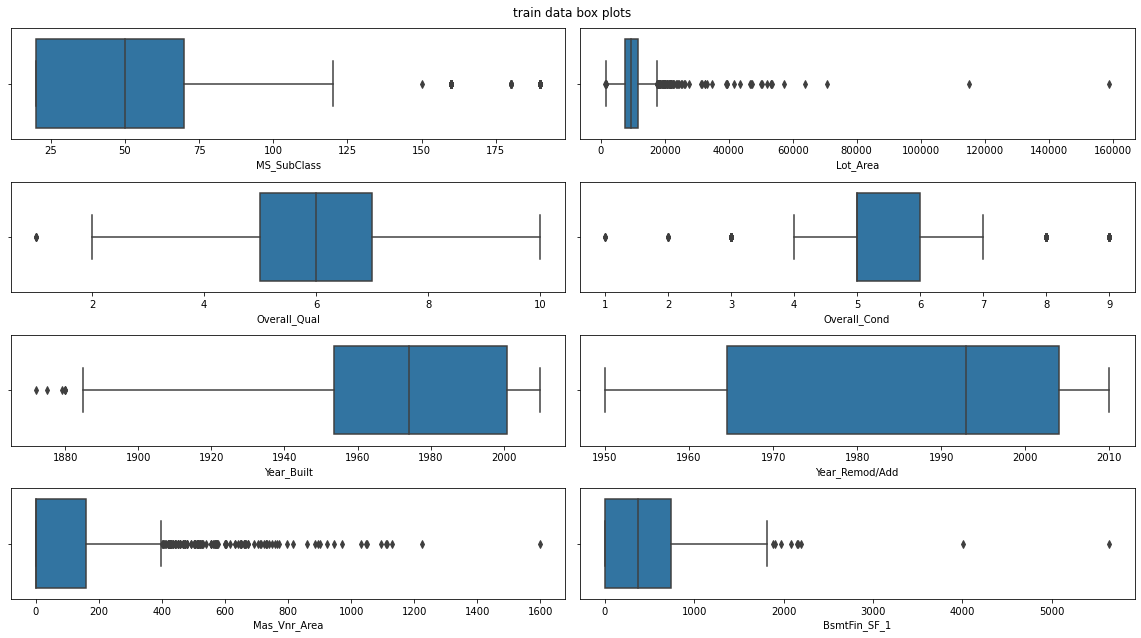

In [44]:
box_plot(4, 2, cont_features[:8], cont_features[:8], train_data, 'train data box plots')

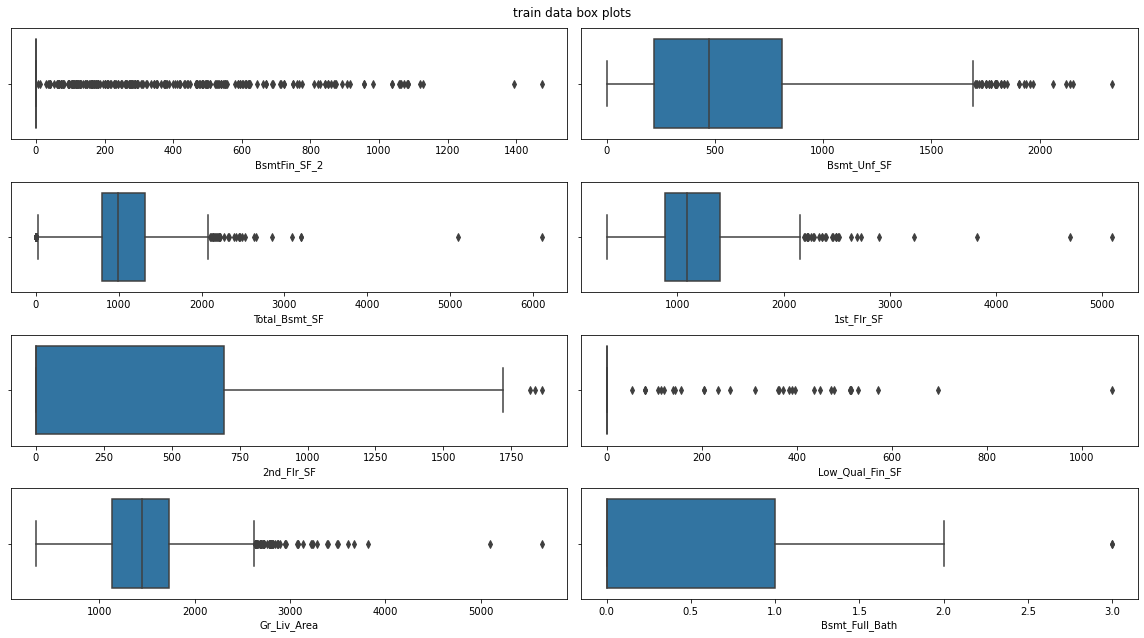

In [45]:
box_plot(4, 2, cont_features[8:16], cont_features[8:16], train_data, 'train data box plots')

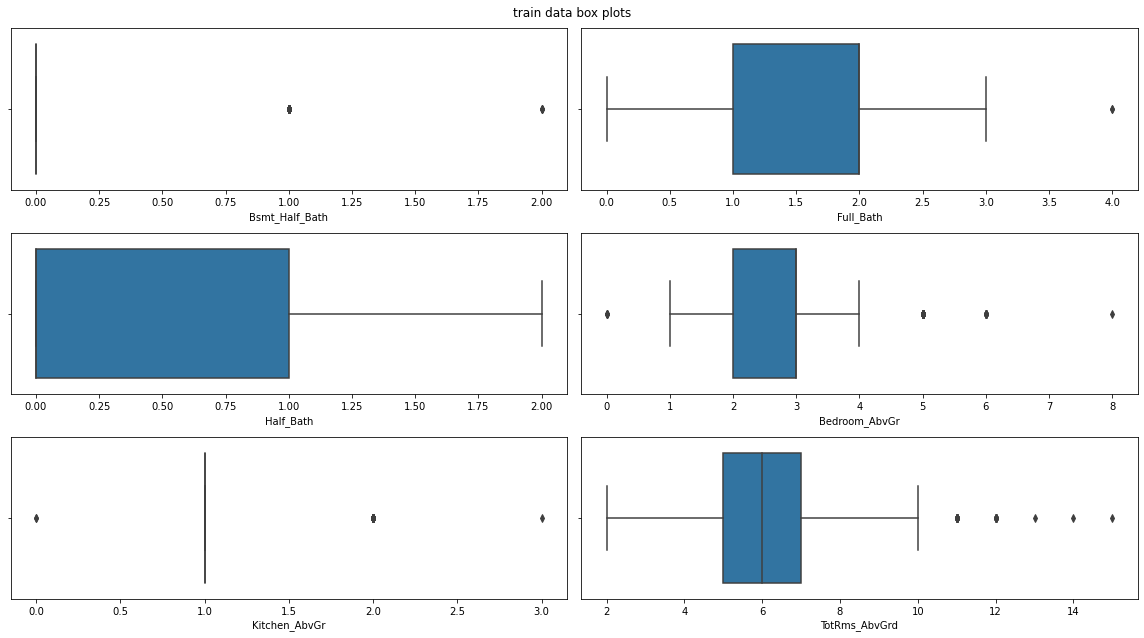

In [46]:
box_plot(3, 2, cont_features[16:22], cont_features[16:22], train_data, 'train data box plots')

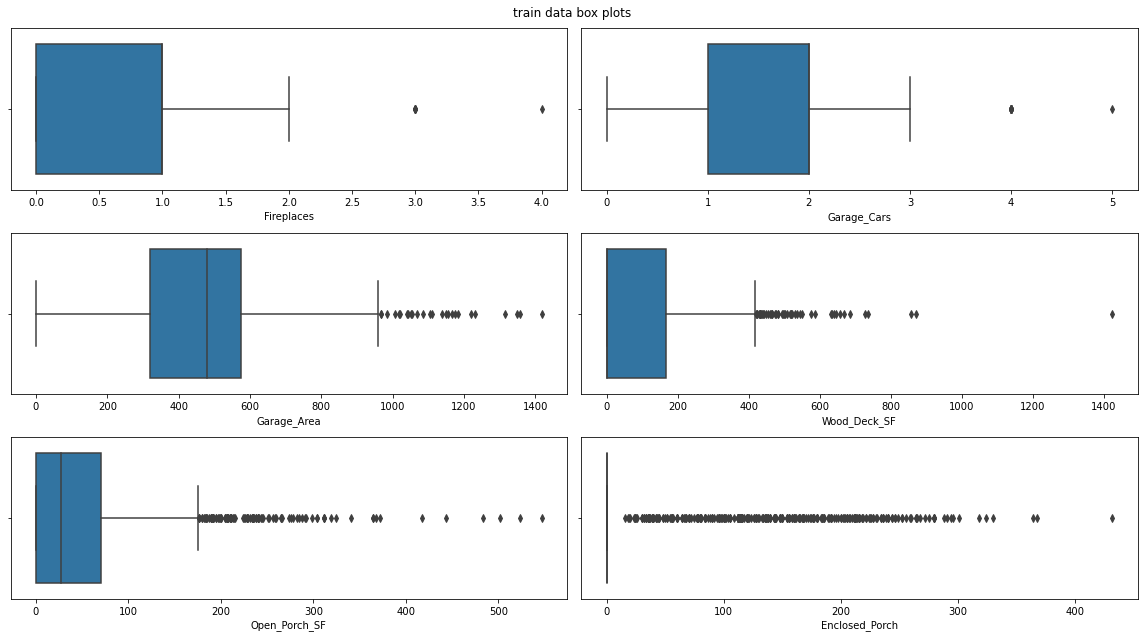

In [47]:
box_plot(3, 2, cont_features[22:28], cont_features[22:28], train_data, 'train data box plots')

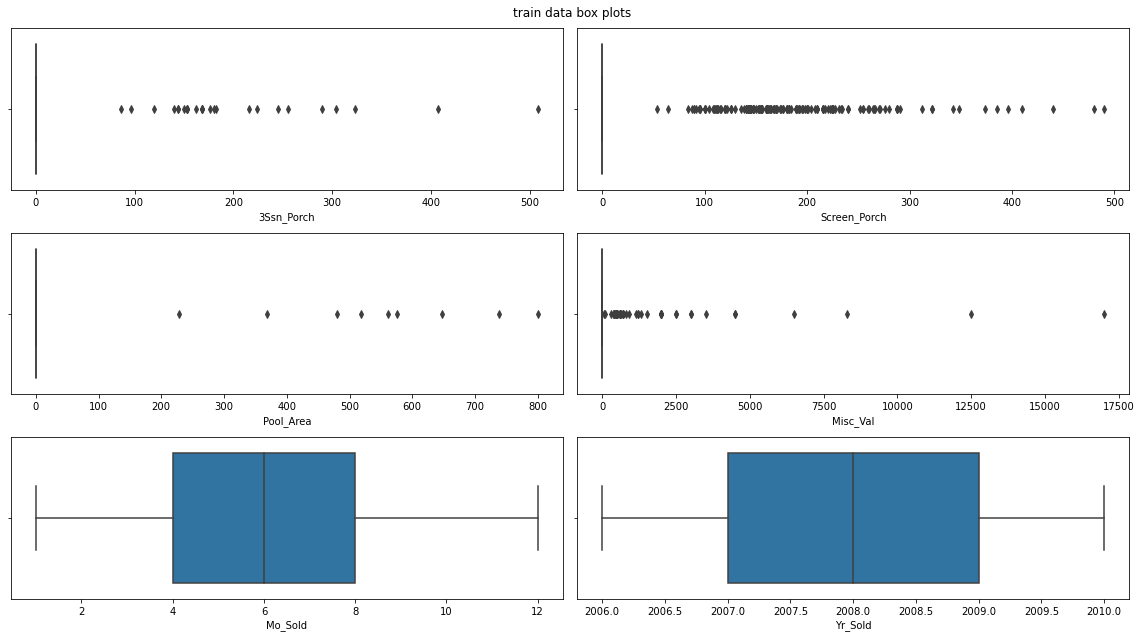

In [48]:
box_plot(3, 2, cont_features[28:], cont_features[28:], train_data, 'train data box plots')

We noticed that most of the boxplots have some outliers. We shall use `Lot_Area` and `Total_Bsmt_SF` to remove some outliers, and run through the look through the boxplots again. This is because `Lot_Area` means the Lot Size in square feet while `Total_Bsmt_SF` tells us the total area of Basement in square feet, which tends to affect the Sale Prices. 

In [49]:
train_data.drop(list(train_data.loc[(train_data['Total_Bsmt_SF'] > 4000) |
                                    (train_data['Lot_Area'] > 100000)].index),
                inplace=True)

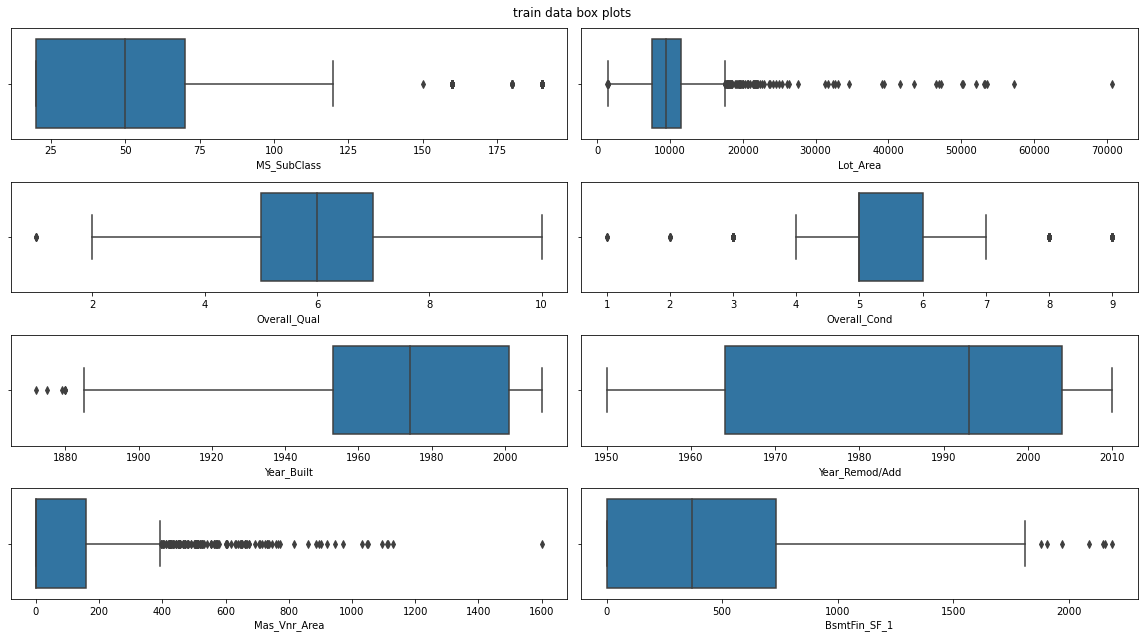

In [50]:
box_plot(4, 2, cont_features[0:8], cont_features[0:8], train_data, 'train data box plots')

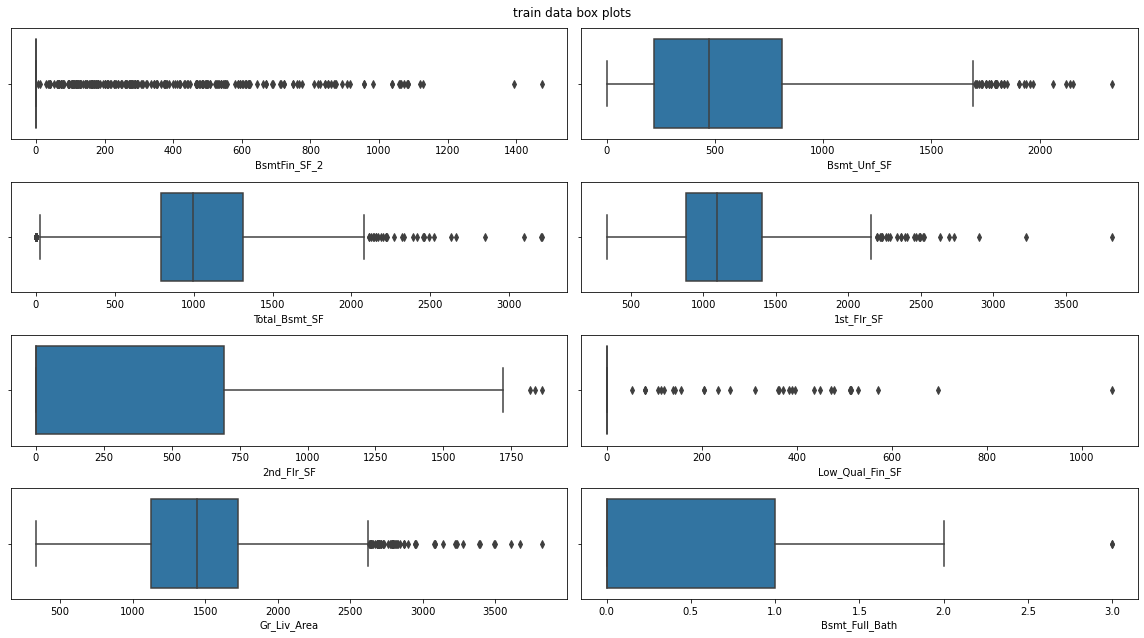

In [51]:
box_plot(4, 2, cont_features[8:16], cont_features[8:16], train_data, 'train data box plots')

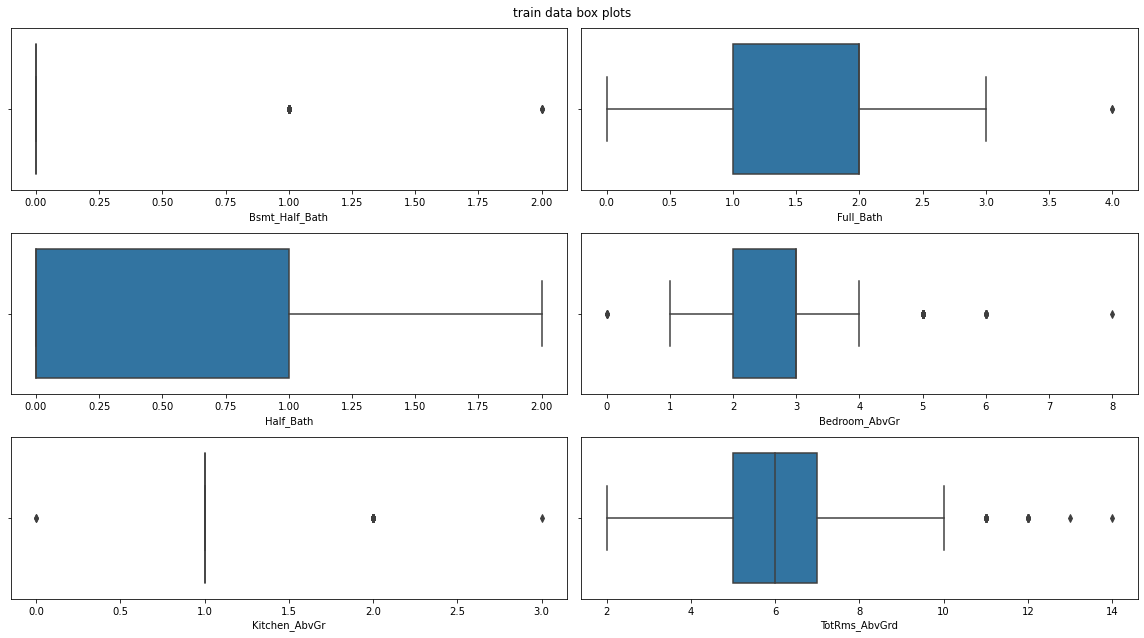

In [52]:
box_plot(3, 2, cont_features[16:22], cont_features[16:22], train_data, 'train data box plots')

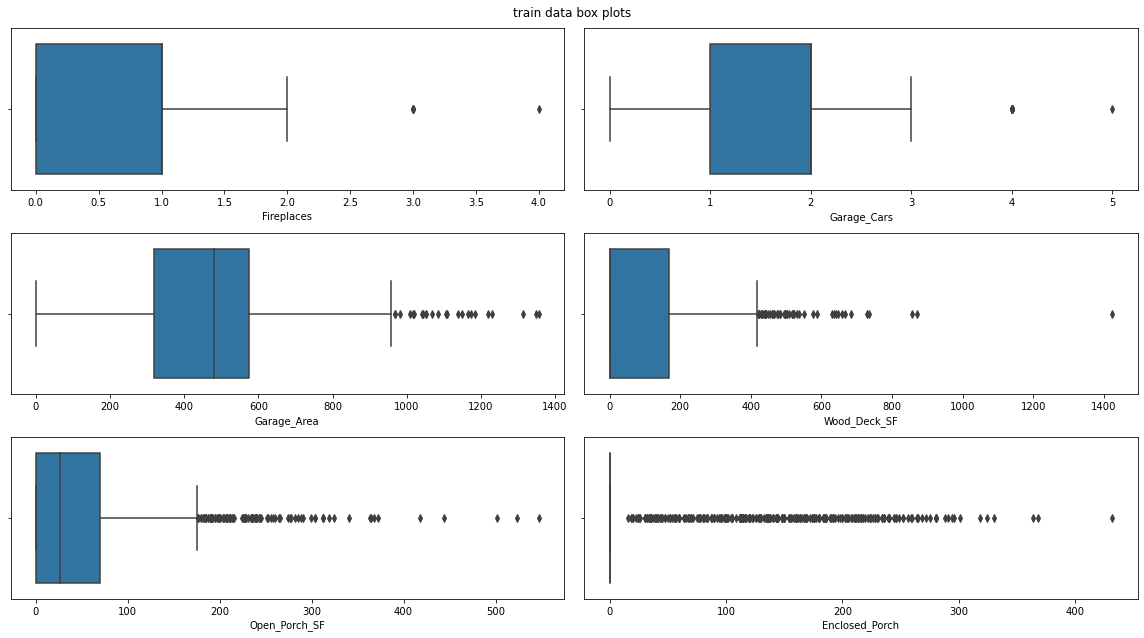

In [53]:
box_plot(3, 2, cont_features[22:28], cont_features[22:28], train_data, 'train data box plots')

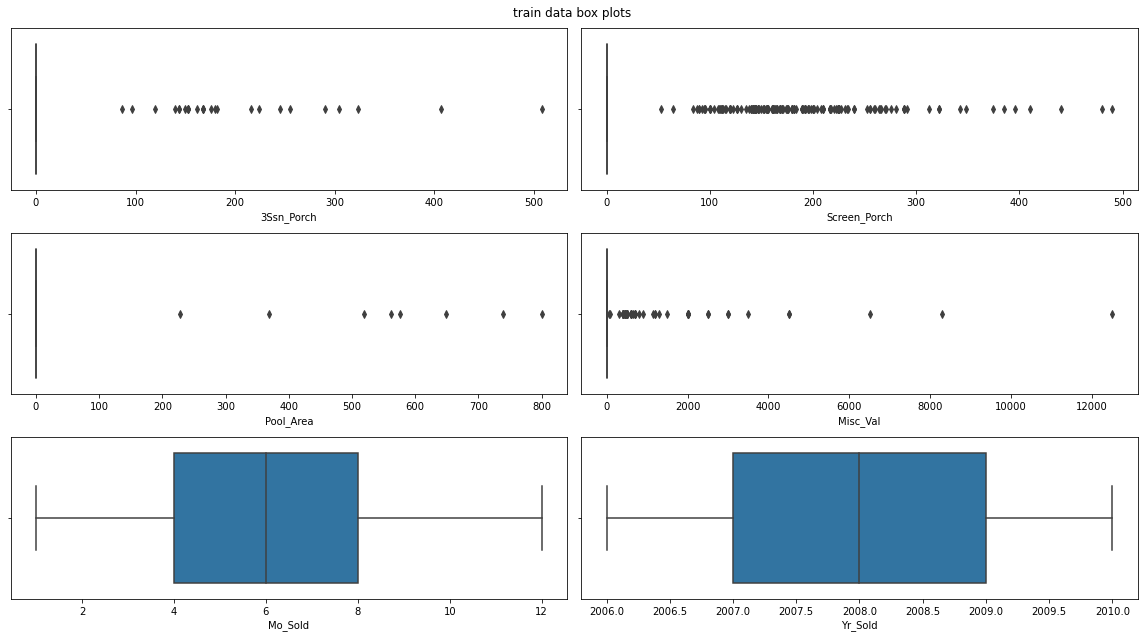

In [54]:
box_plot(3, 2, cont_features[28:], cont_features[28:], train_data, 'train data box plots')

Looking through the boxplots, we noticed that it is hard to draw conclusion for Overall_Qual, Overall_Cond, Bsmt_Full_Bath, Bsmt_Half_Bath, Full_Bath, Half_Bath, Bedroom_AbvGr, Kitchen_AbvGr, TotRms_AvvGrd, Fireplaces, Garage_Cars, Enclosed_Porch, 3Ssn_Porch, Screen_Porch, Pool_Area and Misc_Val. We will plot a histogram with kde to see the spread of the data. We will use a function `histogram_plot` for the plotting. 

In [55]:
temp_hist_feature = ['Overall_Qual', 'Overall_Cond', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
                     'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces',
                     'Garage_Cars', 'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val']
len(temp_hist_feature)

16

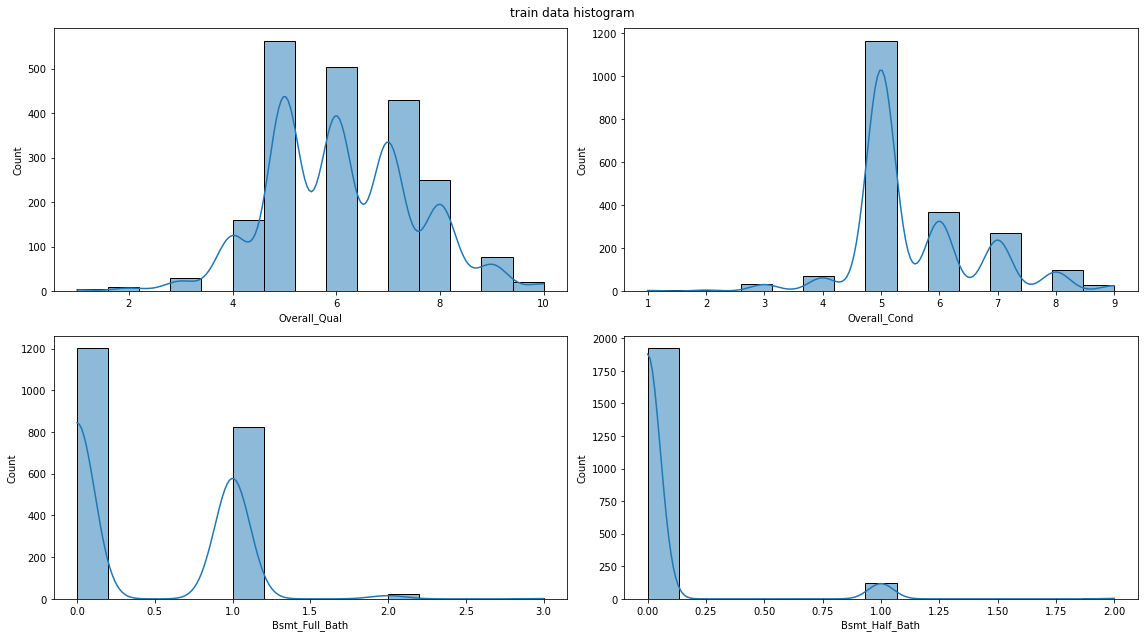

In [56]:
histogram_plot(2, 2, temp_hist_feature[:4], temp_hist_feature[:4], train_data, 'train data histogram')

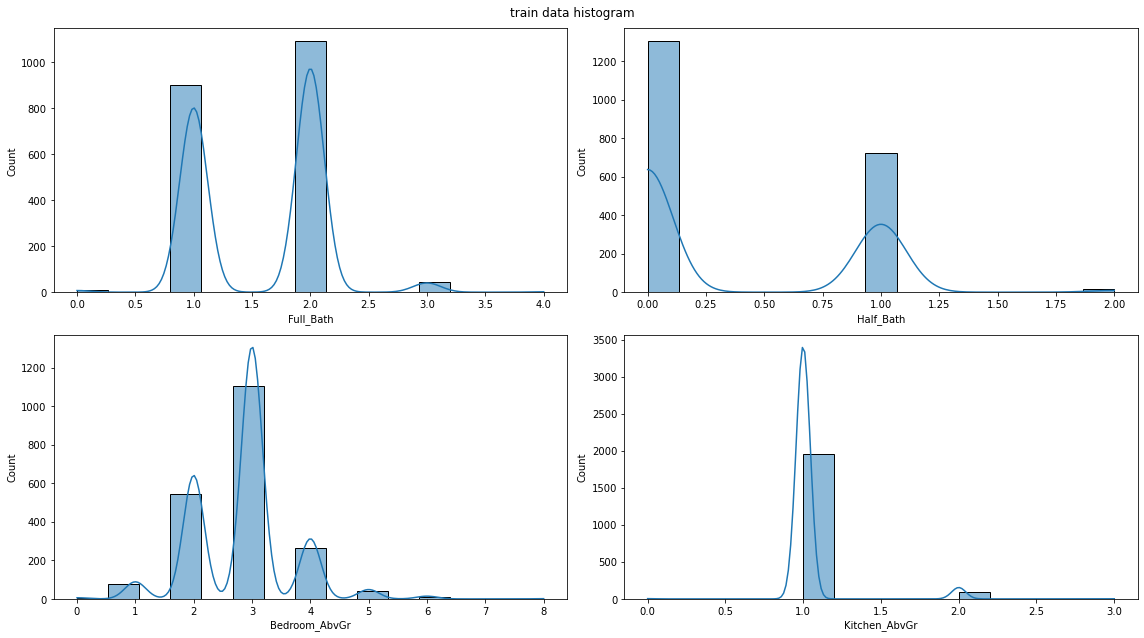

In [57]:
histogram_plot(2, 2, temp_hist_feature[4:8], temp_hist_feature[4:8], train_data, 'train data histogram')

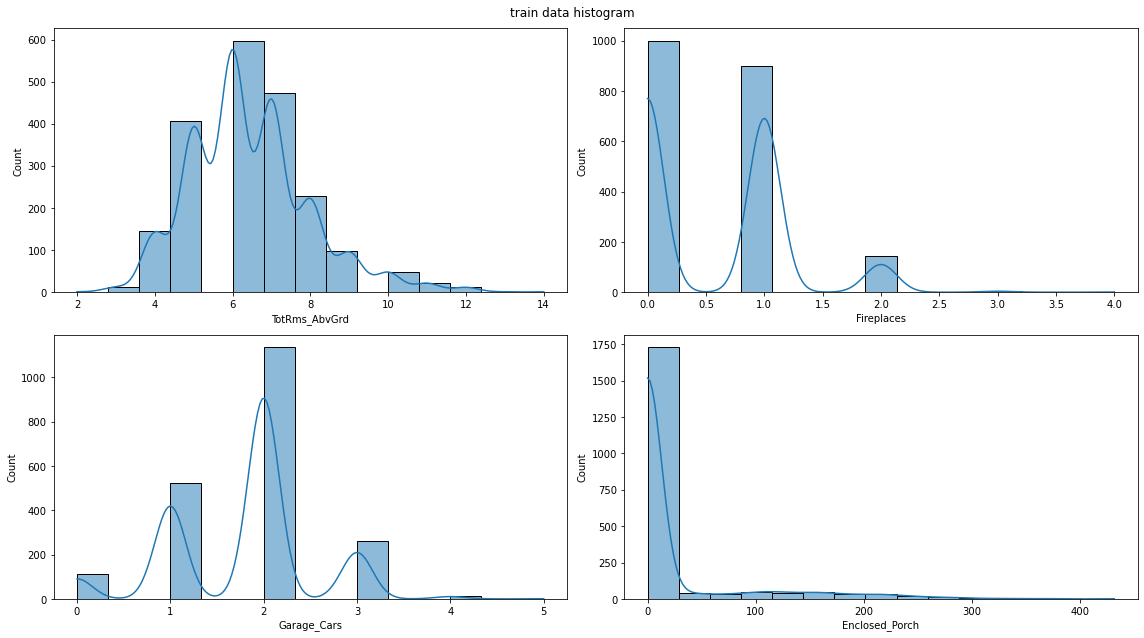

In [58]:
histogram_plot(2, 2, temp_hist_feature[8:12], temp_hist_feature[8:12], train_data, 'train data histogram')

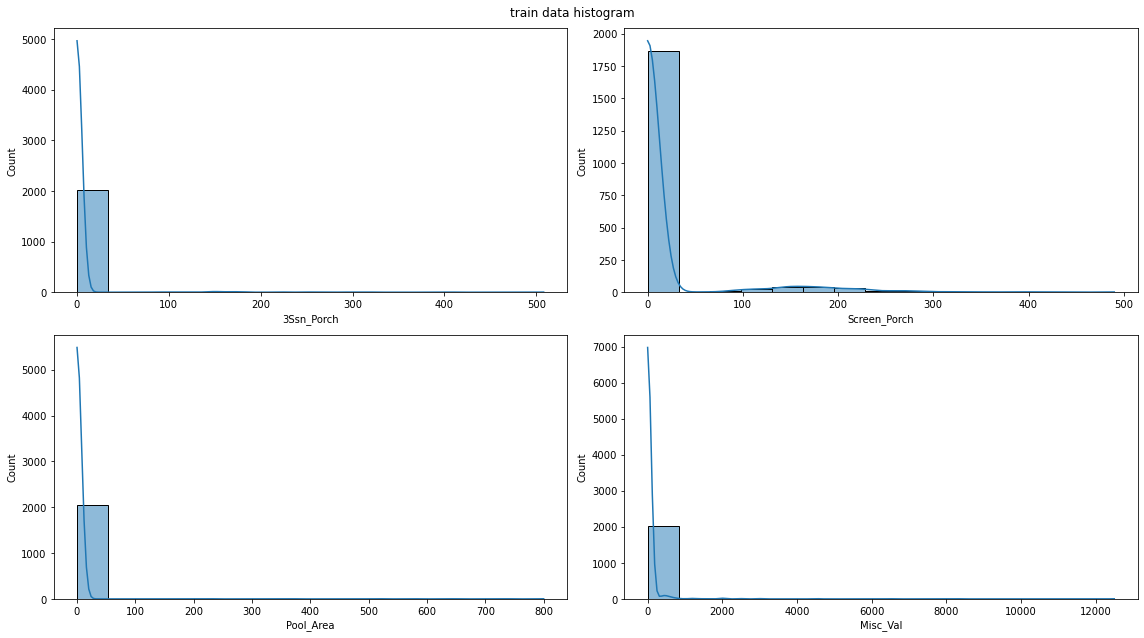

In [59]:
histogram_plot(2, 2, temp_hist_feature[12:], temp_hist_feature[12:], train_data, 'train data histogram')

Looking through the graphs, we notice that out of 2051 data, `3Ssn_Porch`, `Pool_Area` and `Misc_Val`, majority of the data are of `0` values. Hence, we will drop this 3 features from the training and testing data. 

In [60]:
train_data.drop(columns = ['3Ssn_Porch', 'Pool_Area', 'Misc_Val'], inplace=True)
test_data.drop(columns = ['3Ssn_Porch', 'Pool_Area', 'Misc_Val'], inplace=True)

Lets look at the non-numerical features now. There are 42 of the features. We will use barplots to plot these data. 

In [61]:
len(cat_features)

42

With 42 Categorical features, we will look at them in plots of 6 at one time. We will use a function `bar_plot` to do the plotting. 

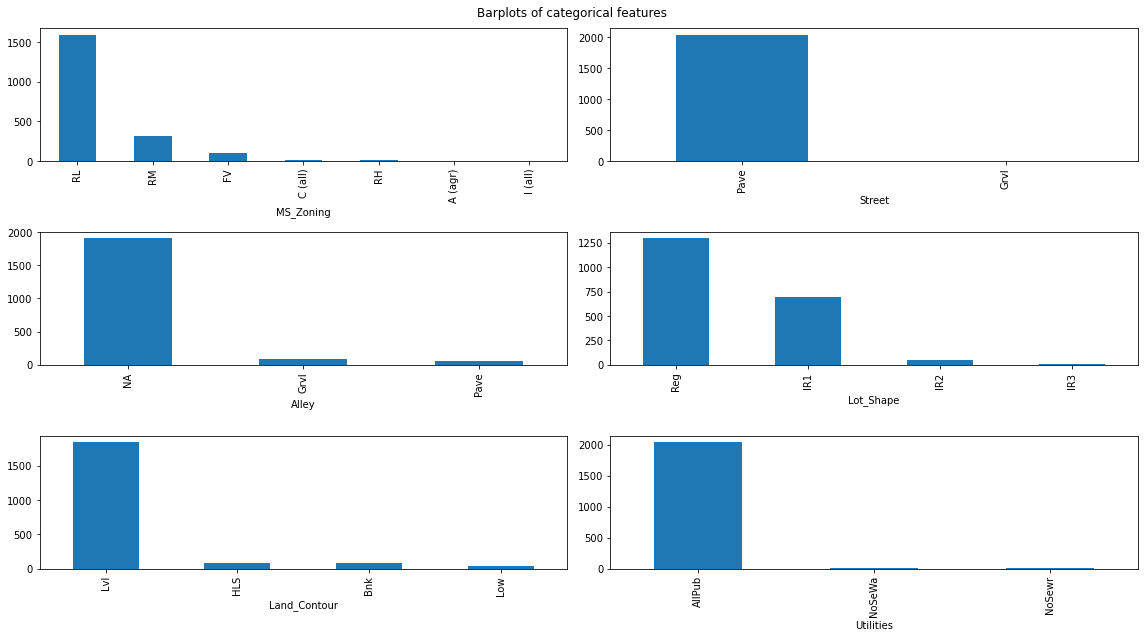

In [62]:
bar_plot(3, 2, cat_features[:6], train_data[cat_features[:6]], 'Barplots of categorical features')

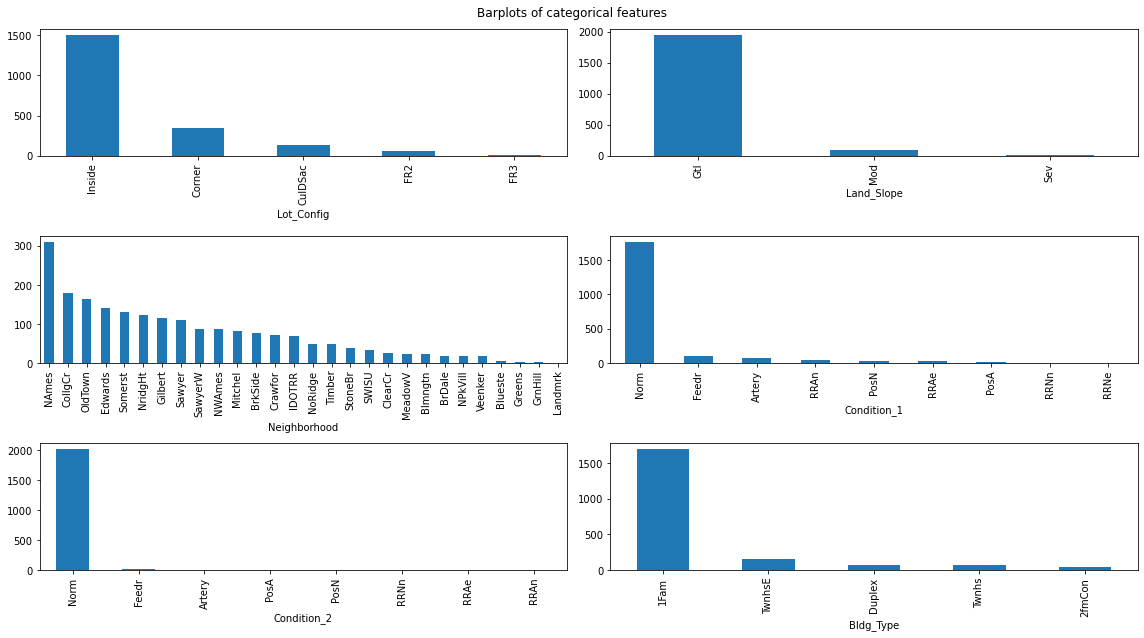

In [63]:
bar_plot(3, 2, cat_features[6:12], train_data[cat_features[6:12]], 'Barplots of categorical features')

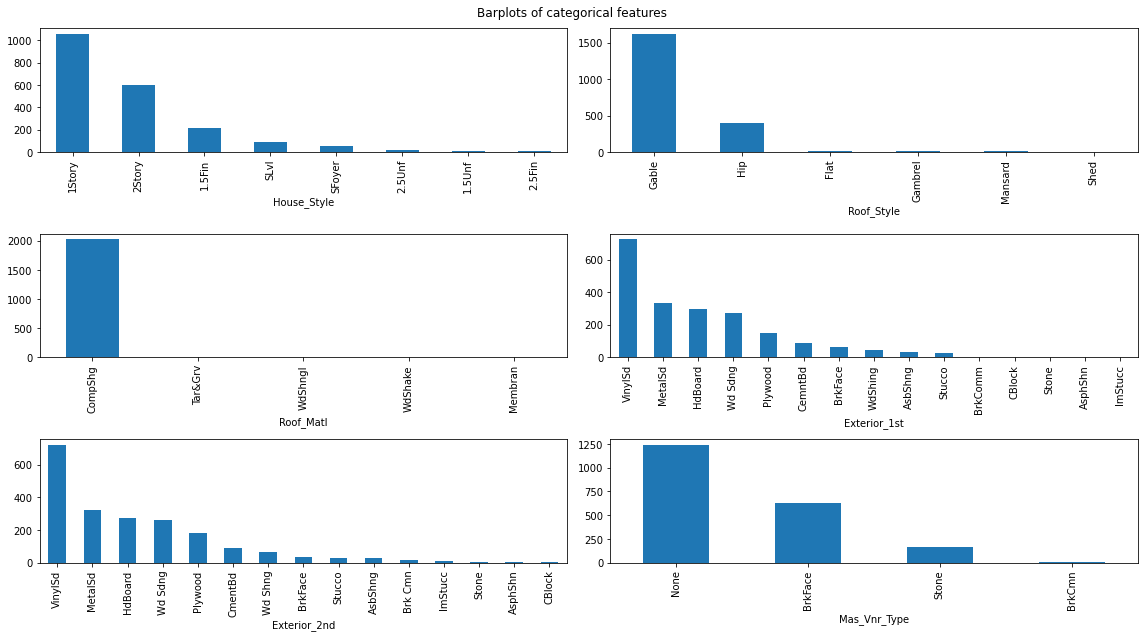

In [64]:
bar_plot(3, 2, cat_features[12:18], train_data[cat_features[12:18]], 'Barplots of categorical features')

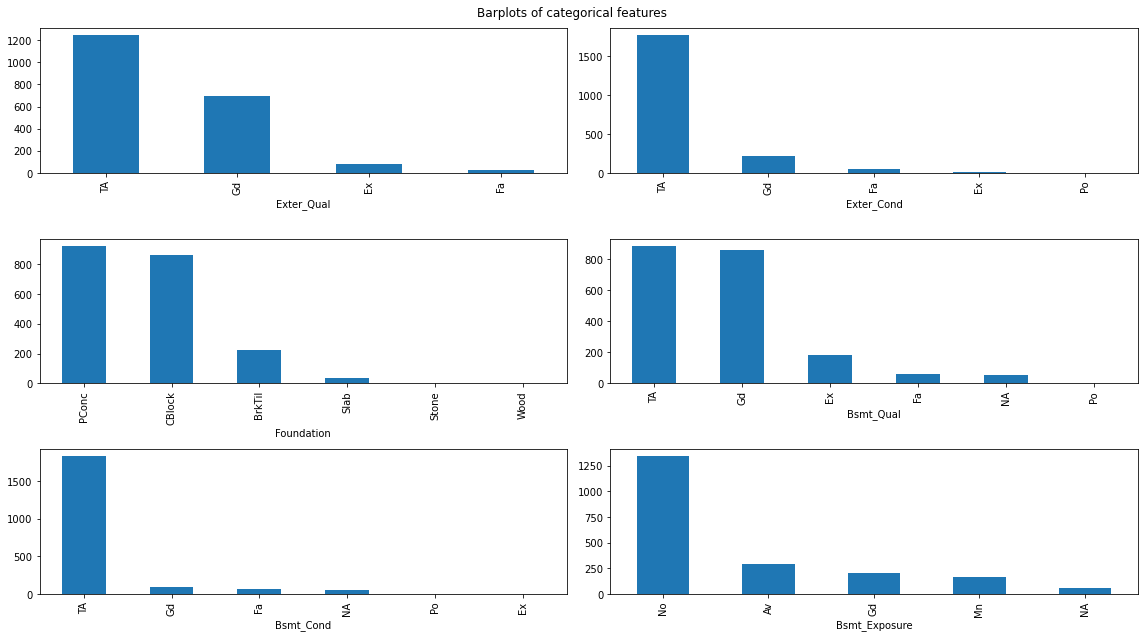

In [65]:
bar_plot(3, 2, cat_features[18:24], train_data[cat_features[18:24]], 'Barplots of categorical features')

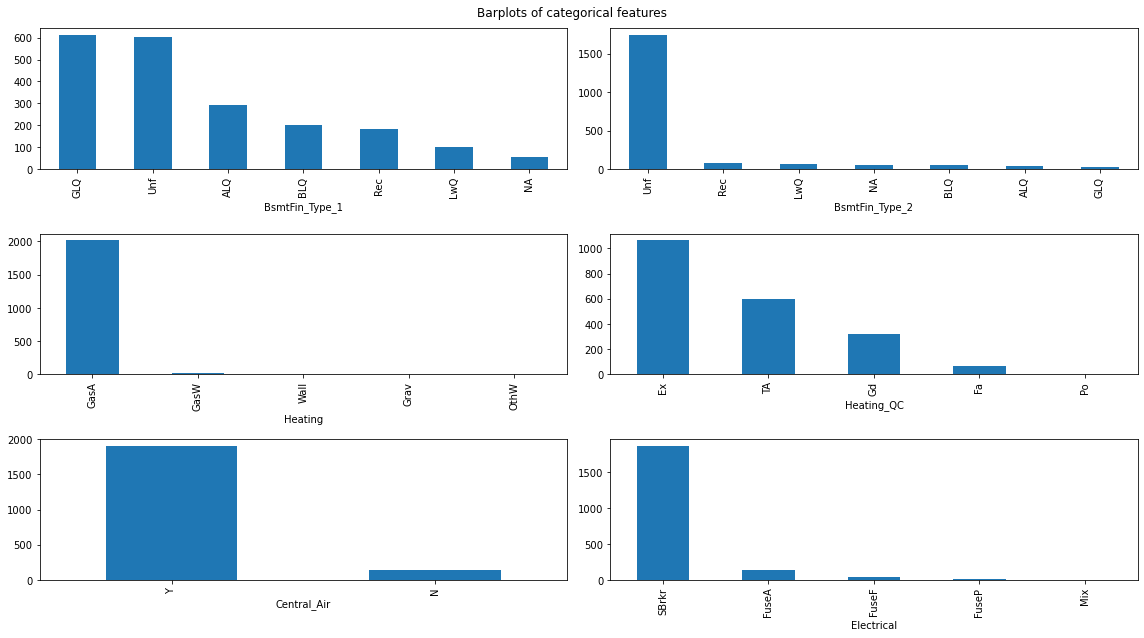

In [66]:
bar_plot(3, 2, cat_features[24:30], train_data[cat_features[24:30]], 'Barplots of categorical features')

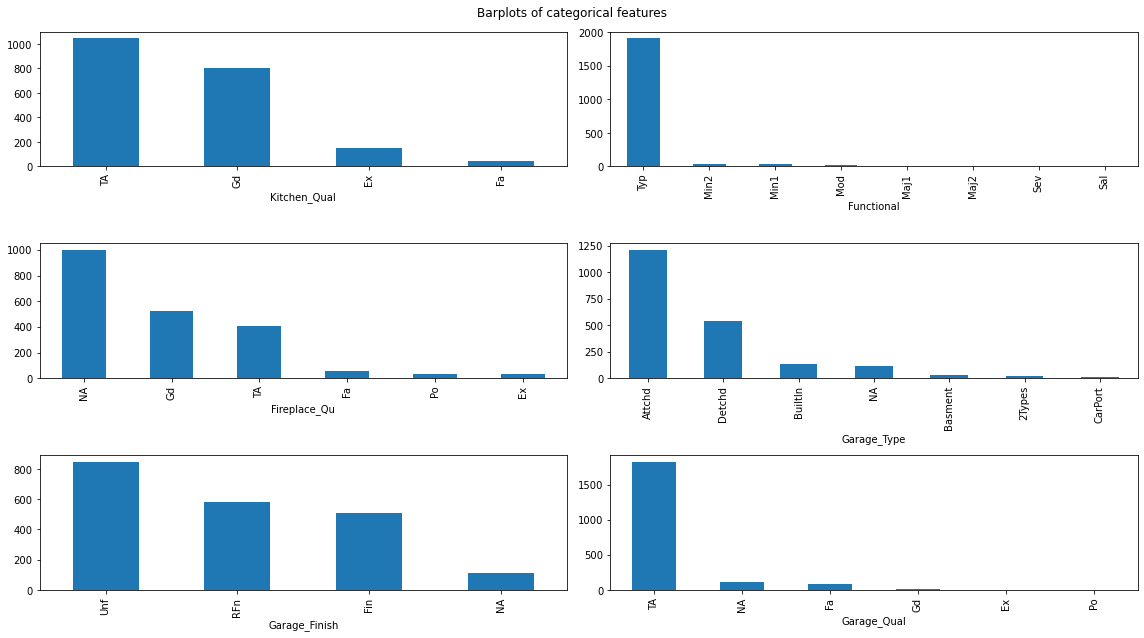

In [67]:
bar_plot(3, 2, cat_features[30:36], train_data[cat_features[30:36]], 'Barplots of categorical features')

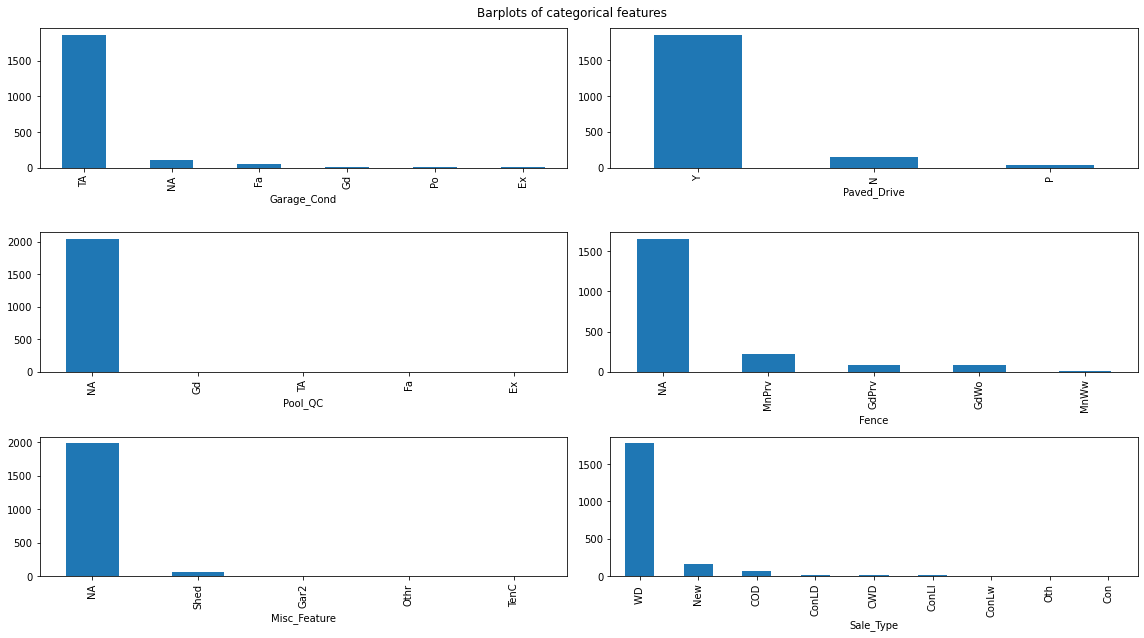

In [68]:
bar_plot(3, 2, cat_features[36:], train_data[cat_features[36:]], 'Barplots of categorical features')

We noticed that majority of the values for these features are concentrated on 1 value, which does not exactly suggest outlier values, hence we will not be removing any features or data from this analysis

### Data Export

Finally, we will save the cleaned data for usage in modeling. 

In [69]:
# create cleaned_data folder if it does not exist in current folder
if not os.path.exists('../cleaned_data'):
    os.makedirs('../cleaned_data')
    
# Export the csv file into kaggle_submission folder
train_data.to_csv('../cleaned_data/train_data.csv', index=False)
test_data.to_csv('../cleaned_data/test_data.csv', index=False)

## Exploratory Data Analysis

As our problem statement suggests, we are planning to look at the Sale Price over the years and only `train_data` have Sale Price. As such, we will only perform Exploratory Data Analysis (EDA) on `train_data`. 

Let us explore the top 5 features that had the highest positive correlation with Sale Price in `train_data`. With a high correlation, it suggests that these values have a high positive relationship with Sale Price.

Running the code below, we know we will be exploring the following features over the years.  
1. `SalePrice` over the years. 
2. `Overall_Qual`
3. `Gr_Liv_Area`
4. `Total_Bsmt_SF`
5. `Garage_Area`
6. `Garage_Cars`

In [70]:
# change the view to see all values
# pd.set_option('display.max_rows', None)

# inspect correlation matrix
corr_saleprice = pd.DataFrame({'feature': list(train_data.corr()['SalePrice'].index),
                           'Coef': list(train_data.corr()['SalePrice']),
                           'abs(Coef)': [np.abs(i) for i in list(train_data.corr()['SalePrice'])]}
                         ).sort_values(by='Coef', ascending=False)

corr_saleprice.head(6)

# reset the view back to default
#pd.set_option('display.max_rows', 60)

,feature,Coef,abs(Coef)
33,SalePrice,1.000000,1.000000
4,Overall_Qual,0.803859,0.803859
16,Gr_Liv_Area,0.719230,0.719230
12,Total_Bsmt_SF,0.664617,0.664617
26,Garage_Area,0.655514,0.655514
25,Garage_Cars,0.648808,0.648808


### `SalePrice`

Let us first take a look at the `SalePrice` over the years. 

In [71]:
train_data.groupby('Yr_Sold')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Yr_Sold,,,,,,,,
2006,438.0,179471.609589,81906.247408,35000.0,129575.0,159250.0,213342.5,584500.0
2007,495.0,185107.793939,77085.660060,39300.0,130000.0,167000.0,215000.0,591587.0
2008,434.0,181800.488479,77470.580228,13100.0,129500.0,163000.0,219701.5,475000.0
2009,446.0,182455.244395,81882.460077,34900.0,129925.0,163000.0,213000.0,582933.0
2010,234.0,174180.059829,77047.778280,12789.0,128000.0,155000.0,206000.0,611657.0


- In year 2010, `SalePrice` achieved both the highest and lowest value over the years. It also had the lowest count as well, suggesting that in year 2010, there is far lesser house sold compared to the other years. 
- In year 2007, it had the highest count, suggesting that it has the most house sold during this year. 
- Over the years, around 50% of the data lies between \\$120,000 and \\$220,000.

Let us take a look at the histogram of the `SalePrice` over the years.

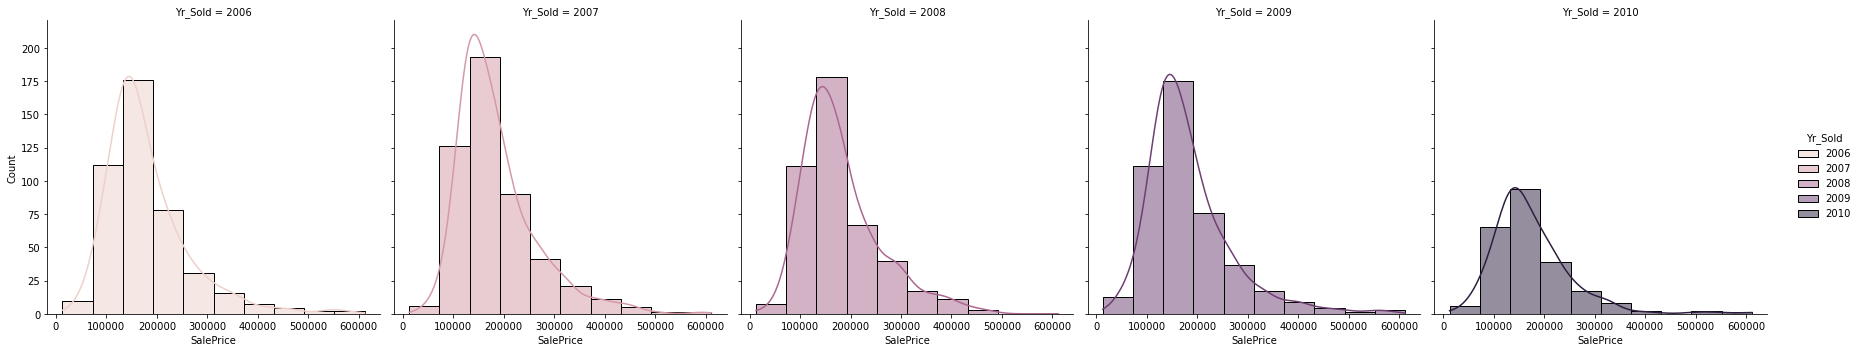

In [72]:
sns.displot(x='SalePrice', data=train_data, col = 'Yr_Sold', bins  = 10, kde = True, hue='Yr_Sold');

Although the counts differs between the years, the spread of `SalePrice` remains roughly the same, with majority of the houses bing sold between \\$100,000 and \\$200,000, tallying with the conclusion drawn previously. 

Let us look at the boxplot for `SalePrice` over the years. 

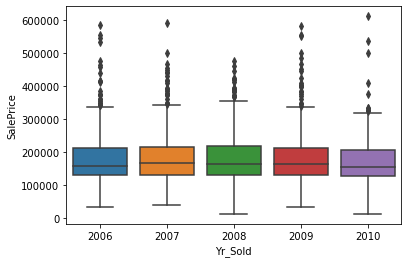

In [73]:
sns.boxplot(y='SalePrice', data=train_data, x = 'Yr_Sold');

We can see that the data towards the higher ranges tends to be by itself, meaning that not many houses are able to acheive this value of Sale Price. 

### `Overall_Qual`

Let's take a look at `Overall_Qual`, which refers to the rating of the overall material and finish of the house.

In [74]:
train_data.groupby('Yr_Sold')['Overall_Qual'].describe()

,count,mean,std,min,25%,50%,75%,max
Yr_Sold,,,,,,,,
2006,438.0,6.066210,1.454953,1.0,5.0,6.0,7.0,10.0
2007,495.0,6.149495,1.391805,1.0,5.0,6.0,7.0,10.0
2008,434.0,6.161290,1.408248,1.0,5.0,6.0,7.0,10.0
2009,446.0,6.123318,1.485675,1.0,5.0,6.0,7.0,10.0
2010,234.0,5.970085,1.324563,2.0,5.0,6.0,7.0,9.0


- In year 2010, none of the houses sold hit the highest rating of 10 as compared to the previous years. 
    - We noticed that despite not having the highest rating, in year 2010 had the highest Sale Price of the house. 
- Over the years, 50% of the data have a rating between 5.0 to 7.0. 

Let us take a look at the histogram.

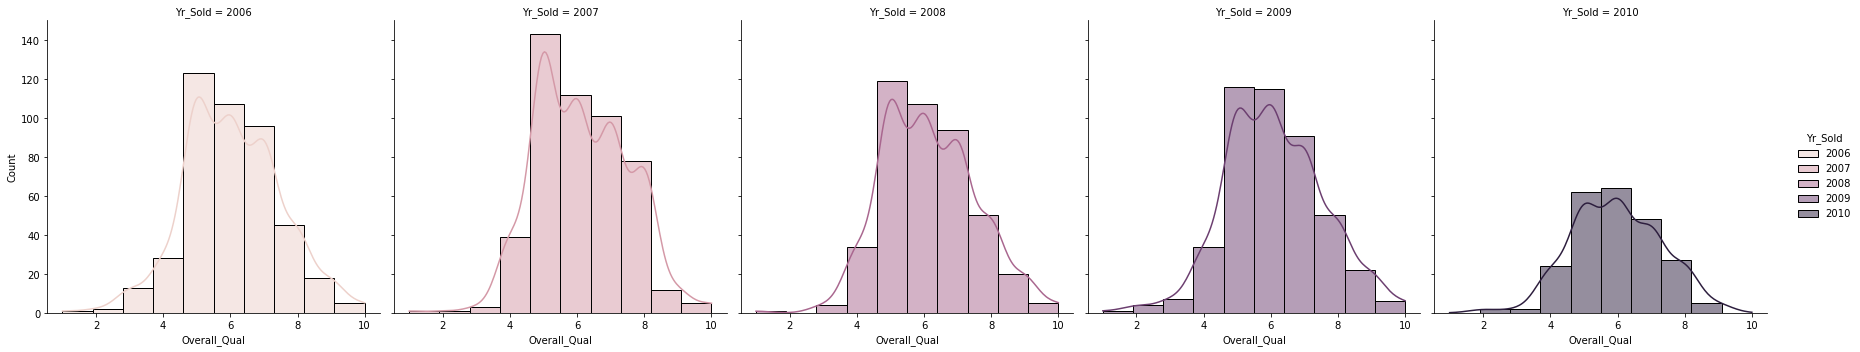

In [75]:
sns.displot(x='Overall_Qual', data=train_data, col = 'Yr_Sold', bins  = 10, kde = True, hue='Yr_Sold');

We noticed that over the years, the spread of `Overall_Qual` is relatively the same, with the main differnce with year 2010 having the mode of 6 instead of 5. 

Let us take a look at the boxplot. 

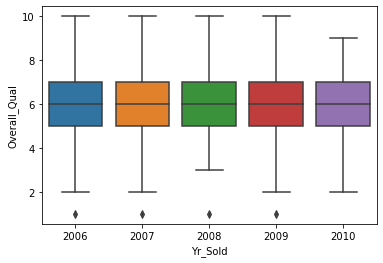

In [76]:
sns.boxplot(y='Overall_Qual', data=train_data, x = 'Yr_Sold');

We noticed that houses with a rating of 1 for `Overall_Qual` tends to be small over the years from 2006 to 2009. 

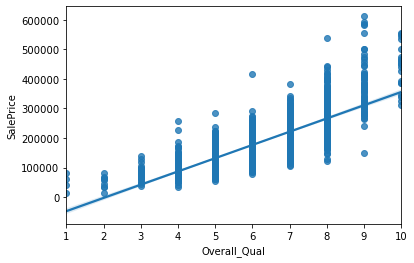

In [77]:
sns.regplot(x='Overall_Qual', y='SalePrice', data=train_data);

We see that as `Overall_Qual` increases, the `SalePrice` tends to increase as well. 

### `Gr_Liv_Area`

Let's take a look at `Gr_Liv_Area`, which represents above grade (ground) living area square feet.

In [78]:
train_data.groupby('Yr_Sold')['Gr_Liv_Area'].describe()

,count,mean,std,min,25%,50%,75%,max
Yr_Sold,,,,,,,,
2006,438.0,1486.000000,503.969252,480.0,1119.50,1415.0,1733.25,3672.0
2007,495.0,1511.072727,492.875610,334.0,1126.50,1440.0,1748.00,3395.0
2008,434.0,1501.670507,497.034652,520.0,1126.25,1444.0,1728.00,3820.0
2009,446.0,1506.715247,459.508279,438.0,1186.25,1478.5,1718.00,3140.0
2010,234.0,1443.811966,463.172387,540.0,1093.00,1379.5,1692.25,3279.0


- In year 2008, it had the highest `Gr_Liv_Area`.
- In year 2006, it had the lowest `Gr_Liv_Area`.
- Over the years, around 50% of the data lies between 1000 and 1800.

Let us take a look at the histogram.

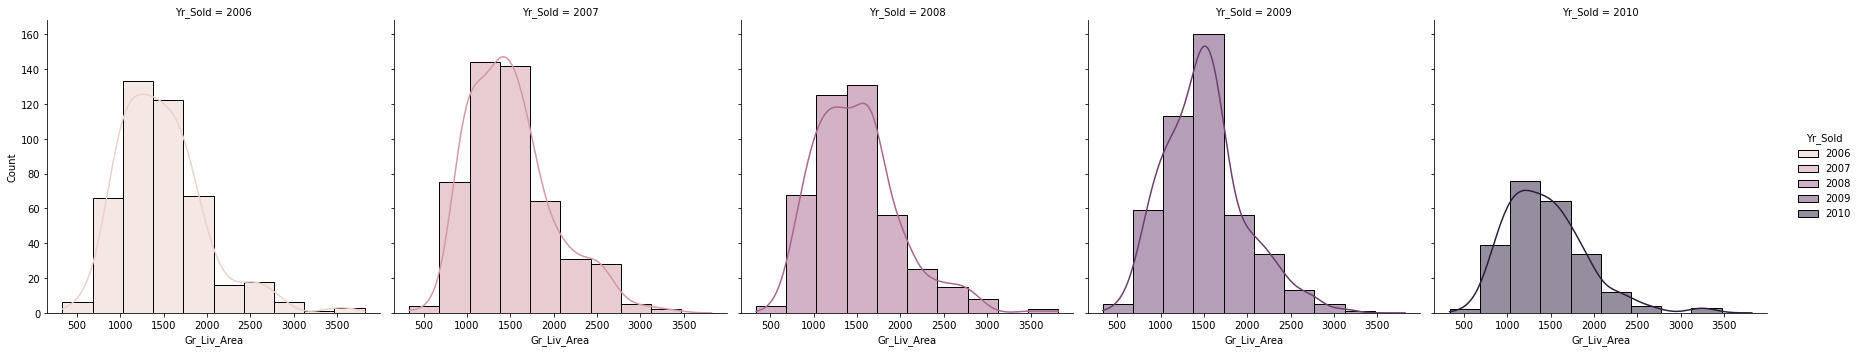

In [79]:
sns.displot(x='Gr_Liv_Area', data=train_data, col = 'Yr_Sold', bins  = 10, kde = True, hue='Yr_Sold');

We notice that the spread of `Gr_Liv_Area` are similar across the years.

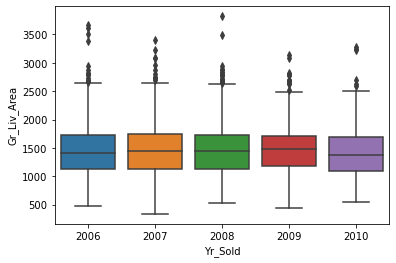

In [80]:
sns.boxplot(y='Gr_Liv_Area', data=train_data, x = 'Yr_Sold');

We can see that the data towards the higher ranges tends to be by itself, meaning that not many houses are able to acheive this value of `Gr_Liv_Area`.

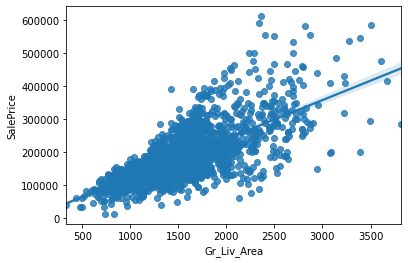

In [81]:
sns.regplot(x='Gr_Liv_Area', y='SalePrice', data=train_data);

We see that as `Gr_Liv_Area` increases, the `SalePrice` tends to increase as well. 

### `Total_Bsmt_SF`
Let's take a look at `Total_Bsmt_SF`, which represents total square feet of basement area.

In [82]:
train_data.groupby('Yr_Sold')['Total_Bsmt_SF'].describe()

,count,mean,std,min,25%,50%,75%,max
Yr_Sold,,,,,,,,
2006,438.0,1034.438356,402.258048,0.0,784.00,1007.5,1251.0,2171.0
2007,495.0,1084.789899,422.175080,0.0,823.00,1001.0,1337.5,3200.0
2008,434.0,1037.255760,411.268630,0.0,792.25,988.0,1296.0,2418.0
2009,446.0,1052.221973,474.131241,0.0,768.00,992.0,1356.0,3206.0
2010,234.0,1047.401709,412.961783,0.0,780.00,989.5,1304.5,2846.0


- In year 2009, the house sold had the highest value.
- All years have the same minimum value, which is 0, which fits the profile as there are houses with no basement. 
- Over the years, around 50% of the data lies between 760 square feet to 1400 square feet. 

Let us take a look at the histogram.

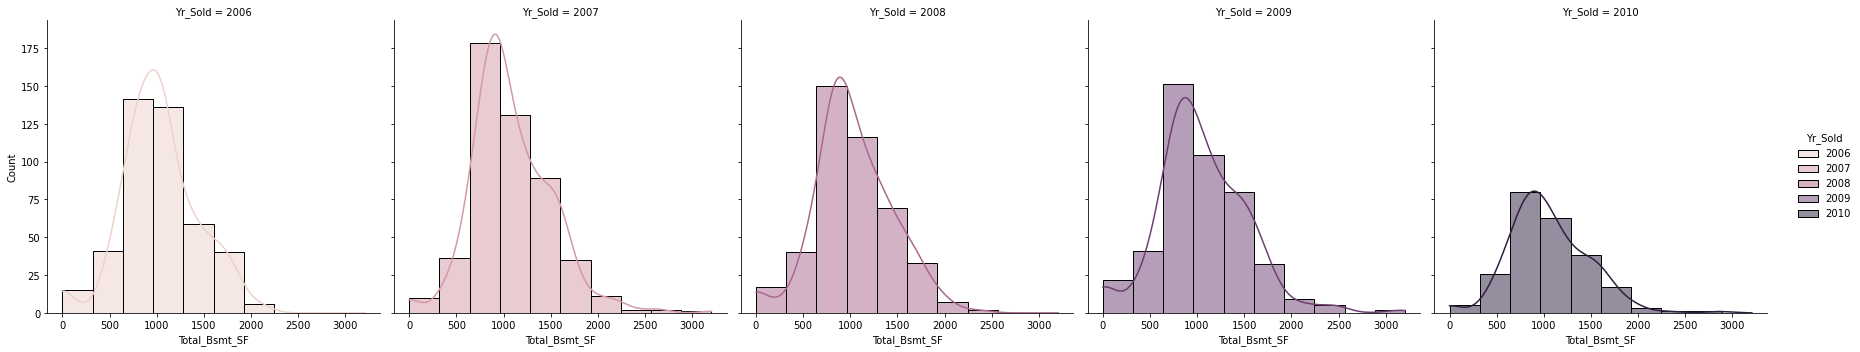

In [83]:
sns.displot(x='Total_Bsmt_SF', data=train_data, col = 'Yr_Sold', bins  = 10, kde = True, hue='Yr_Sold');

We notice that the spread of `Total_Bsmt_SF` are similar across the years.

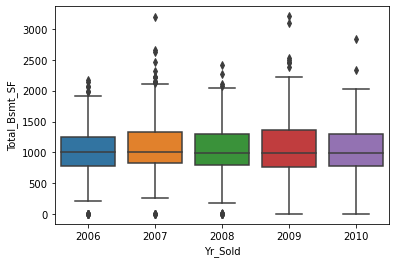

In [84]:
sns.boxplot(y='Total_Bsmt_SF', data=train_data, x = 'Yr_Sold');

We can see that the data towards the higher ranges tends to be by itself, meaning that not many houses have this value of `Total_Bsmt_SF`.

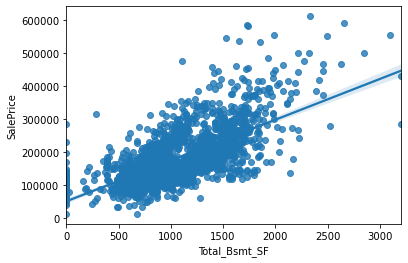

In [85]:
sns.regplot(x='Total_Bsmt_SF', y='SalePrice', data=train_data);

We see that as `Total_Bsmt_SF` increases, the `SalePrice` tends to increase as well. 

### `Garage_Area`

Let's take a look at `Garage_Area`, which represents Size of garage in square feet.

In [86]:
train_data.groupby('Yr_Sold')['Garage_Area'].describe()

,count,mean,std,min,25%,50%,75%,max
Yr_Sold,,,,,,,,
2006,438.0,463.210046,209.800945,0.0,319.0,472.0,576.00,1085.0
2007,495.0,489.040404,211.905731,0.0,340.0,484.0,578.50,1356.0
2008,434.0,461.264977,226.999489,0.0,308.0,477.5,576.00,1348.0
2009,446.0,483.076233,219.651744,0.0,321.0,478.0,583.00,1231.0
2010,234.0,458.551282,192.056008,0.0,331.5,480.0,570.75,1017.0


- In year 2007, the house sold had the highest garage area. 
- All years have the same minimum value, which is 0, which fits the profile as there are houses with no garage. 
- Over the years, around 50% of the data lies between 315 square feet to 585 square feet. 

Let us take a look at the histogram.

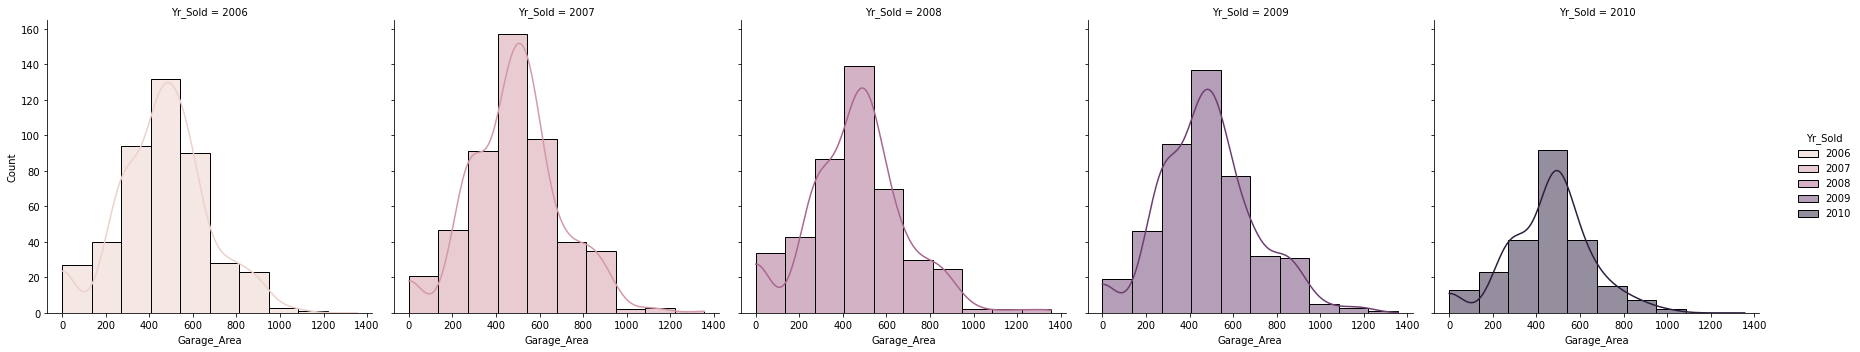

In [87]:
sns.displot(x='Garage_Area', data=train_data, col = 'Yr_Sold', bins  = 10, kde = True, hue='Yr_Sold');

We notice that the spread of `Garage_Area` are similar across the years.

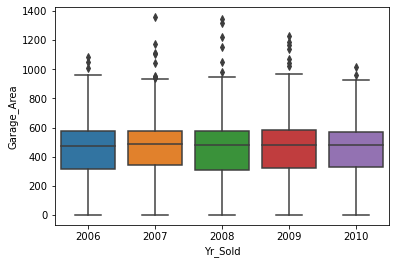

In [88]:
sns.boxplot(y='Garage_Area', data=train_data, x = 'Yr_Sold');

We can see that the data towards the higher ranges tends to be by itself, meaning that not many houses have this value of `Garage_Area`.

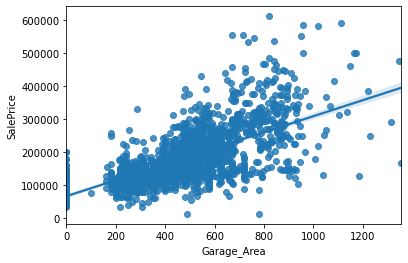

In [89]:
sns.regplot(x='Garage_Area', y='SalePrice', data=train_data);

We see that as `Garage_Area` increases, the `SalePrice` tends to increase as well. 

### `Garage_Cars`
Let's take a look at `Garage_Cars`, which represents size of garage in car capacity.

In [90]:
train_data.groupby('Yr_Sold')['Garage_Cars'].describe()

,count,mean,std,min,25%,50%,75%,max
Yr_Sold,,,,,,,,
2006,438.0,1.755708,0.772616,0.0,1.0,2.0,2.0,4.0
2007,495.0,1.824242,0.727857,0.0,1.0,2.0,2.0,4.0
2008,434.0,1.737327,0.812795,0.0,1.0,2.0,2.0,4.0
2009,446.0,1.811659,0.773405,0.0,1.0,2.0,2.0,5.0
2010,234.0,1.713675,0.711090,0.0,1.0,2.0,2.0,4.0


- In year 2009, the house sold had the highest value. 
- All years have the same minimum value, which is 0, which fits the profile as there are houses with no garage. 
- Over the years, around 50% of the data lies between 1 to 2 car capacity. 

Let us take a look at the histogram.

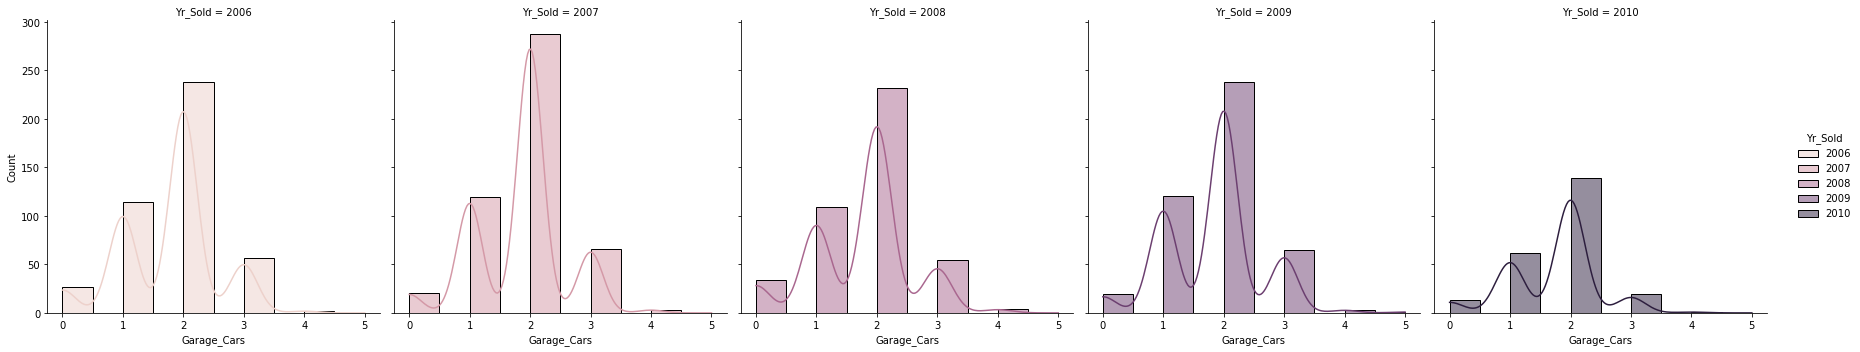

In [91]:
sns.displot(x='Garage_Cars', data=train_data, col = 'Yr_Sold', bins  = 10, kde = True, hue='Yr_Sold');

We notice that the spread of `Garage_Cars` are similar across the years.

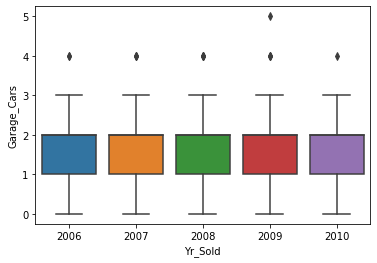

In [92]:
sns.boxplot(y='Garage_Cars', data=train_data, x = 'Yr_Sold');

We see that minority of the houses have car capacity of 4 or 5. 

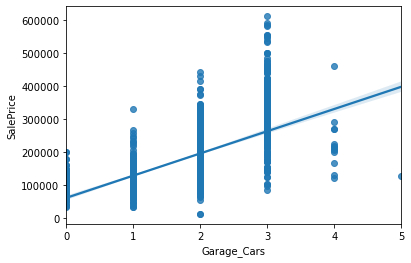

In [93]:
sns.regplot(x='Garage_Cars', y='SalePrice', data=train_data);

We see that as `Garage_Cars` increases, the `SalePrice` tends to increase as well based on the regression line. However, it seems to not be the case when `Garage_Cars`=5

In [94]:
# sns.pairplot(train_data[['SalePrice', 'Overall_Qual', 'Gr_Liv_Area', 'Garage_Area', 'Garage_Cars','Total_Bsmt_SF']]);

Let us explore the bottom 3 features that had the highest negative correlation with Sale Price in `train_data`. With a high correlation, it suggests that these values have a high negative relationship with Sale Price.

Running the code below, we know we will be exploring the following features over the years.  
1. `Enclosed_Porch`
2. `Kitchen_AbvGr`
3. `Overall_Cond`

`PID` is Parcel identification number, which is used with city website for parcel review. We will not look at this value's correlation with Sale Price. 

In [95]:
# recall correlation vector corr_saleprice
corr_saleprice.tail(4)

,feature,Coef,abs(Coef)
5,Overall_Cond,-0.097617,0.097617
22,Kitchen_AbvGr,-0.125318,0.125318
29,Enclosed_Porch,-0.135344,0.135344
1,PID,-0.256792,0.256792


### `Enclosed_Porch`
Let's take a look at `Enclosed_Porch`, which represents enclosed porch area in square feet.

In [96]:
train_data.groupby('Yr_Sold')['Enclosed_Porch'].describe()

,count,mean,std,min,25%,50%,75%,max
Yr_Sold,,,,,,,,
2006,438.0,26.130137,65.312303,0.0,0.0,0.0,0.0,330.0
2007,495.0,20.385859,56.047538,0.0,0.0,0.0,0.0,291.0
2008,434.0,22.161290,56.988972,0.0,0.0,0.0,0.0,301.0
2009,446.0,19.486547,57.866825,0.0,0.0,0.0,0.0,432.0
2010,234.0,27.564103,65.823784,0.0,0.0,0.0,0.0,364.0


- In year 2009, the house sold had the highest value. 
- All years have the same minimum value, which is 0, which fits the profile as there are houses with no Enclosed Porch. 
- Over the years, around 75% of the data are 0.  

Let us take a look at the histogram.

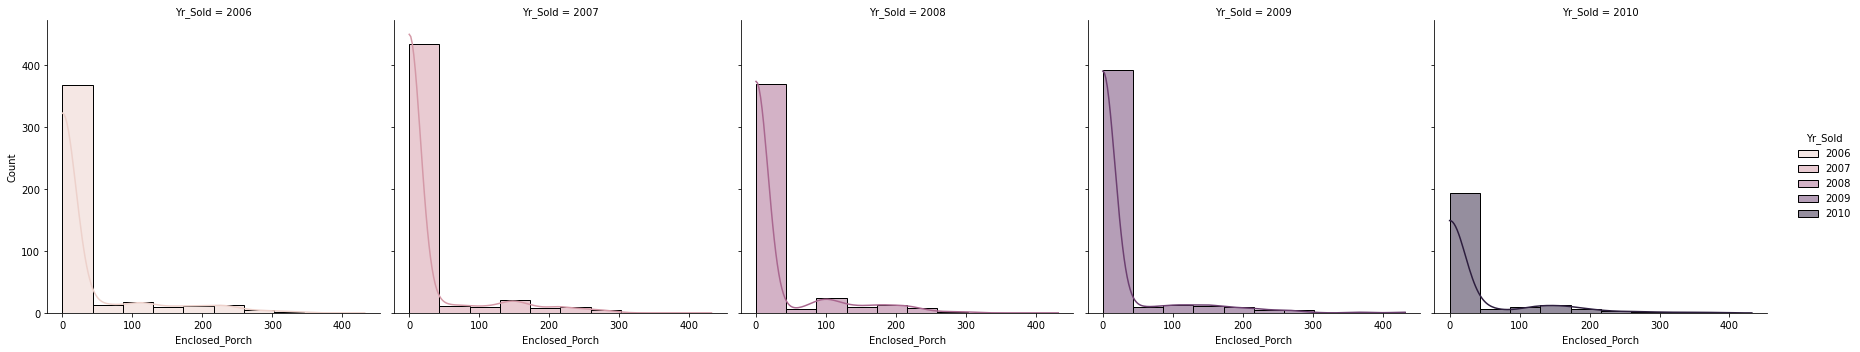

In [97]:
sns.displot(x='Enclosed_Porch', data=train_data, col = 'Yr_Sold', bins  = 10, kde = True, hue='Yr_Sold');

We notice that the spread of `Enclosed_Porch` are similar across the years.

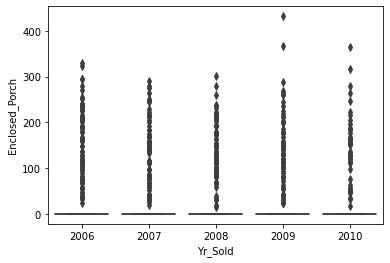

In [98]:
sns.boxplot(y='Enclosed_Porch', data=train_data, x = 'Yr_Sold');

We see that majority of the houses have no enclosed porch. 

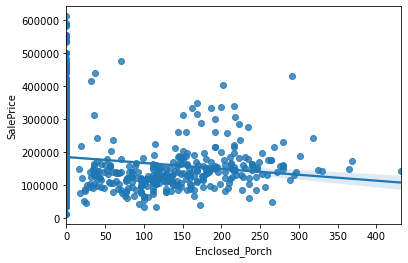

In [99]:
sns.regplot(x='Enclosed_Porch', y='SalePrice', data=train_data);

We see that as `Enclosed_Porch` increases, the `SalePrice` tends to decrease. 

### `Kitchen_AbvGr`
Let's take a look at `Kitchen_AbvGr`, which represents rating of Kitchens above grade.

In [100]:
train_data.groupby('Yr_Sold')['Kitchen_AbvGr'].describe()

,count,mean,std,min,25%,50%,75%,max
Yr_Sold,,,,,,,,
2006,438.0,1.036530,0.210782,0.0,1.0,1.0,1.0,2.0
2007,495.0,1.032323,0.177036,1.0,1.0,1.0,1.0,2.0
2008,434.0,1.057604,0.233261,1.0,1.0,1.0,1.0,2.0
2009,446.0,1.049327,0.226923,1.0,1.0,1.0,1.0,3.0
2010,234.0,1.038462,0.192720,1.0,1.0,1.0,1.0,2.0


- In year 2009, the house sold had the highest grade. 
- In year 2006, there is house sold that had grade 0 for the kitchens.  
- Over the years, more than 50% of the data lies has grade 1. 

Let us take a look at the histogram.

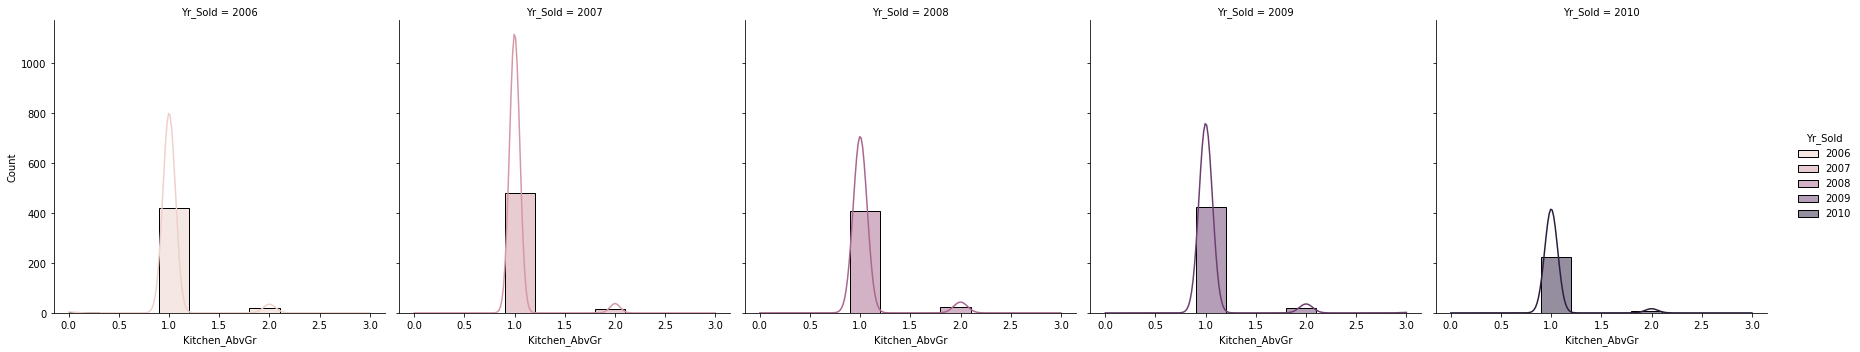

In [101]:
sns.displot(x='Kitchen_AbvGr', data=train_data, col = 'Yr_Sold', bins  = 10, kde = True, hue='Yr_Sold');

We notice that the spread of `Garage_Cars` are similar across the years.

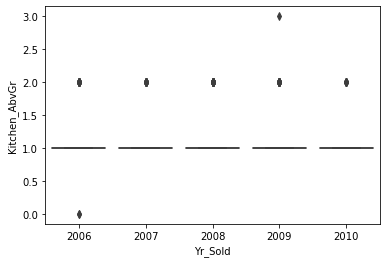

In [102]:
sns.boxplot(y='Kitchen_AbvGr', data=train_data, x = 'Yr_Sold');

We see that minority of the houses have grade that is non 1. 

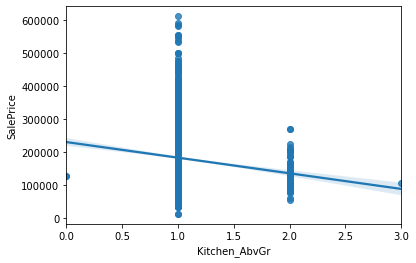

In [103]:
sns.regplot(x='Kitchen_AbvGr', y='SalePrice', data=train_data);

We see that as `Kitchen_AbvGr` increases, the `SalePrice` tends to decrease based on the best-fit line. However, the values are concentrated at 1 which makes it hard for us to interpret if the data follows the best fit line. 

### `Overall_Cond`
Let's take a look at `Overall_Cond`, which represents the rating of the overall condition of the house.

In [104]:
train_data.groupby('Yr_Sold')['Overall_Cond'].describe()

,count,mean,std,min,25%,50%,75%,max
Yr_Sold,,,,,,,,
2006,438.0,5.431507,1.075465,2.0,5.0,5.0,6.0,9.0
2007,495.0,5.555556,1.053452,1.0,5.0,5.0,6.0,9.0
2008,434.0,5.670507,1.116621,1.0,5.0,5.0,6.0,9.0
2009,446.0,5.569507,1.160536,1.0,5.0,5.0,6.0,9.0
2010,234.0,5.606838,1.119145,2.0,5.0,5.0,6.0,9.0


- In year 2007, 2008 and 2009, the house sold had the lowest rating of 1. 
- All years have the highest rating, which is 9. 
- Over the years, around 50% of the data lies between rating of 5 and 6. 

Let us take a look at the histogram.

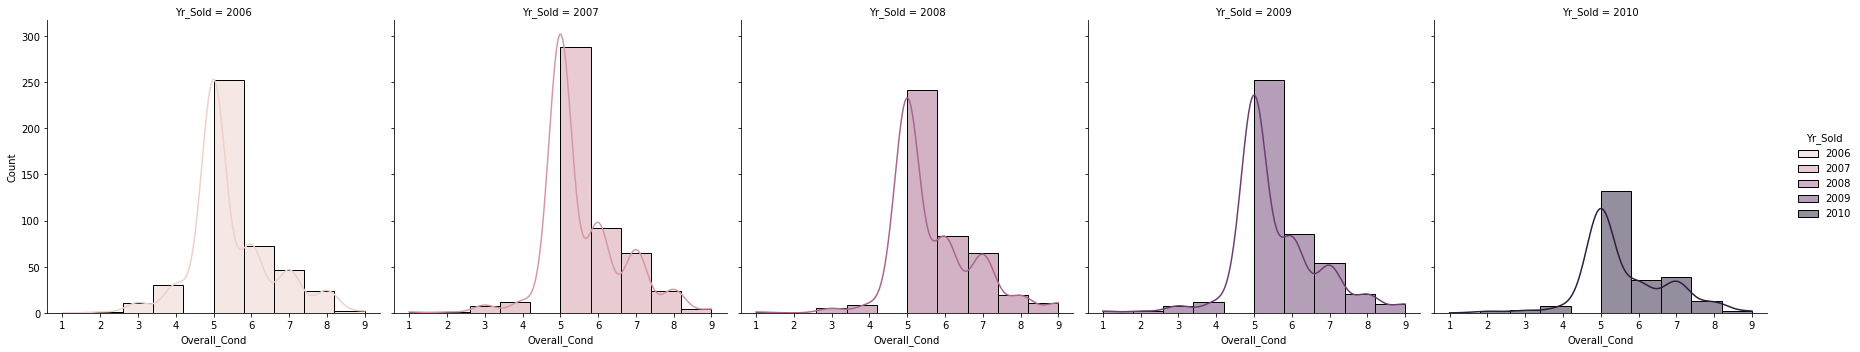

In [105]:
sns.displot(x='Overall_Cond', data=train_data, col = 'Yr_Sold', bins  = 10, kde = True, hue='Yr_Sold');

We notice that the spread of `Overall_Cond` are similar across the years.

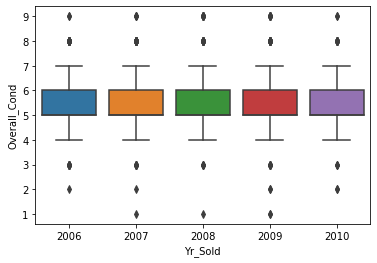

In [106]:
sns.boxplot(y='Overall_Cond', data=train_data, x = 'Yr_Sold');

We see that minority of the houses have rating of below 4 and above 7. 

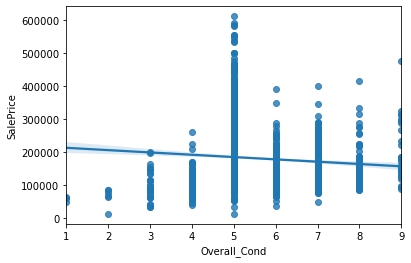

In [107]:
sns.regplot(x='Overall_Cond', y='SalePrice', data=train_data);

We see that as `Overall_Cond` increases, the `SalePrice` tends to decrease. However, the values are concentrated at 5 which makes it hard for us to interpret if the data follows the best fit line.

## Conclusions

From our above EDA, we noticed that we have features that have positive or negative correlation with the Sale Price. 

__Features that had high positive correlation__<br>
- Overall_Qual: Rates the overall material and finish of the house
- Gr_Liv_Area: Above grade (ground) living area square feet
- Total_Bsmt_SF: Total square feet of basement area
- Garage_Area: Size of garage in square feet
- Garage_Cars: Size of garage in car capacity
	
__Features that had high negative correlation__<br>
- Enclosed_Porch: Enclosed porch area in square feet
- Kitchen_AbvGr: Kitchens above grade
- Overall_Cond: Rates the overall condition of the house

However, as correlation only looks at numeric features, we will not be able to interpret the relationship between categorical features and Sale Price. 

For features that had high positive correlation, it made sense that they are there as buyers of houses tends to look out for such features and people tend to be willing to pay more if the house was maintained better or is bigger. 

With this thinking, it would not make sense for the features that had negative correlation as people would assume higher (better) ratings of the house would mean there is an increase in the sale price. 

If we were to make recommendations just solely based on the correlation, we will recommend to improve the overall material and finish of the house, and consider an expansion of the Garage. 

However, we will not be able to answer the sale price prediction for `test_data`. This will require us to do a modeling for the prediction. 

For feature engineering, modeling and Sale Price prediction, refer to [ames_housing_saleprice_prediction.ipynb](./ames_housing_saleprice_prediction.ipynb). 

As not all the features could be useful when we are trying to predict the sale price during modeling. We will likely need to explore more than just using Linear Regression which will take into account all the features we inputted. 

We will also make our overall conclusion and recommendation in that notebook. 